In [1]:
import pickle
import numpy as np
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from mpl_toolkits.mplot3d import Axes3D
from static_1Dfunction import *
from IPython.display import display, HTML
from matplotlib import cm
import seaborn
import matplotlib
from matplotlib.gridspec import GridSpec

display(HTML("<style>.container { width:100% !important; }</style>"))

/opt/easybuild/soft/2021b/software/ELIC_Python/1-foss-2021b/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/easybuild/soft/2021b/software/ELIC_Python/1-foss-2021b/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
#import
dir_name=['hom','n=1','n=2','n=3','n=4','n=5','n=6','n=7','n=8','n=9','n=1alt','n=2bis','n=3bis_1','n=3bis_2','n=4bis_1','n=4bis_2','n=4bis_3']
name_mode=['Homogeneous solution','n=1','n=2','n=3','n=4','n=5','n=6','n=7','n=8','n=9','n=1 alternative','n=2 bis','n=3 bis_1','n=3 bis_2','n=4 bis_1','n=4bis_2','n=4bis_3']

P_mode_tot=[]
W_mode_tot=[]
O_mode_tot=[]
Rains_mode_tot=[]
Stab_mode_tot=[]
Lmb_mode_tot=[]

for i in range(len(dir_name)):
    #print('Saving files for '+dir_name[i])
    with open("L100/"+dir_name[i]+"/P_mode_tot.txt", "rb") as fp:
        P_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/W_mode_tot.txt", "rb") as fp:
        W_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/O_mode_tot.txt", "rb") as fp:
        O_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/Rains_mode_tot.txt", "rb") as fp:
        Rains_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/Stab_mode_tot.txt", "rb") as fp:
        Stab_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/Lmb_mode_tot.txt", "rb") as fp:
        Lmb_mode_tot.append(pickle.load(fp))
         
   
with open("L100/param.txt", "rb") as fp:   
    param = pickle.load(fp)

dx=2*np.pi/100
L=100
x=np.arange(0,2*np.pi,dx)*(L/(2*np.pi))


N_mode=len(P_mode_tot)
print(N_mode)

def detect_bumps(x,treshold):
    NZeros=np.zeros(np.shape(x)[0])
    for i in range(int(np.shape(x)[0])):
        if x[i]>(np.min(x)+treshold):
            NZeros[i]=1
    bumps=[]
    on=0
    for i in range(int(np.shape(x)[0])):
        if NZeros[i]==1 and on==0:
            bumps.append([])
            bumps[-1].append(i)
            on=1
        elif NZeros[i]==1 and on==1:
            bumps[-1].append(i)
        else:
            on=0
    if NZeros[0]==1 and NZeros[-1]==1:
        bumps[0]+=bumps[-1]
        bumps=bumps[:-1]
    return(bumps)    



17


In [3]:

# Colorblind 
color_mode=[]
color_mode.append('black')
seaborn.color_palette("colorblind")
for i in range(10):
    color_mode.append(seaborn.color_palette("colorblind")[i])

color_mode.append(seaborn.color_palette("dark")[1])
color_mode.append(seaborn.color_palette("dark")[2]) 
color_mode.append(seaborn.color_palette("dark")[3])  
color_mode.append(seaborn.color_palette("dark")[4])  
color_mode.append(seaborn.color_palette("dark")[5])
color_mode.append(seaborn.color_palette("dark")[6])



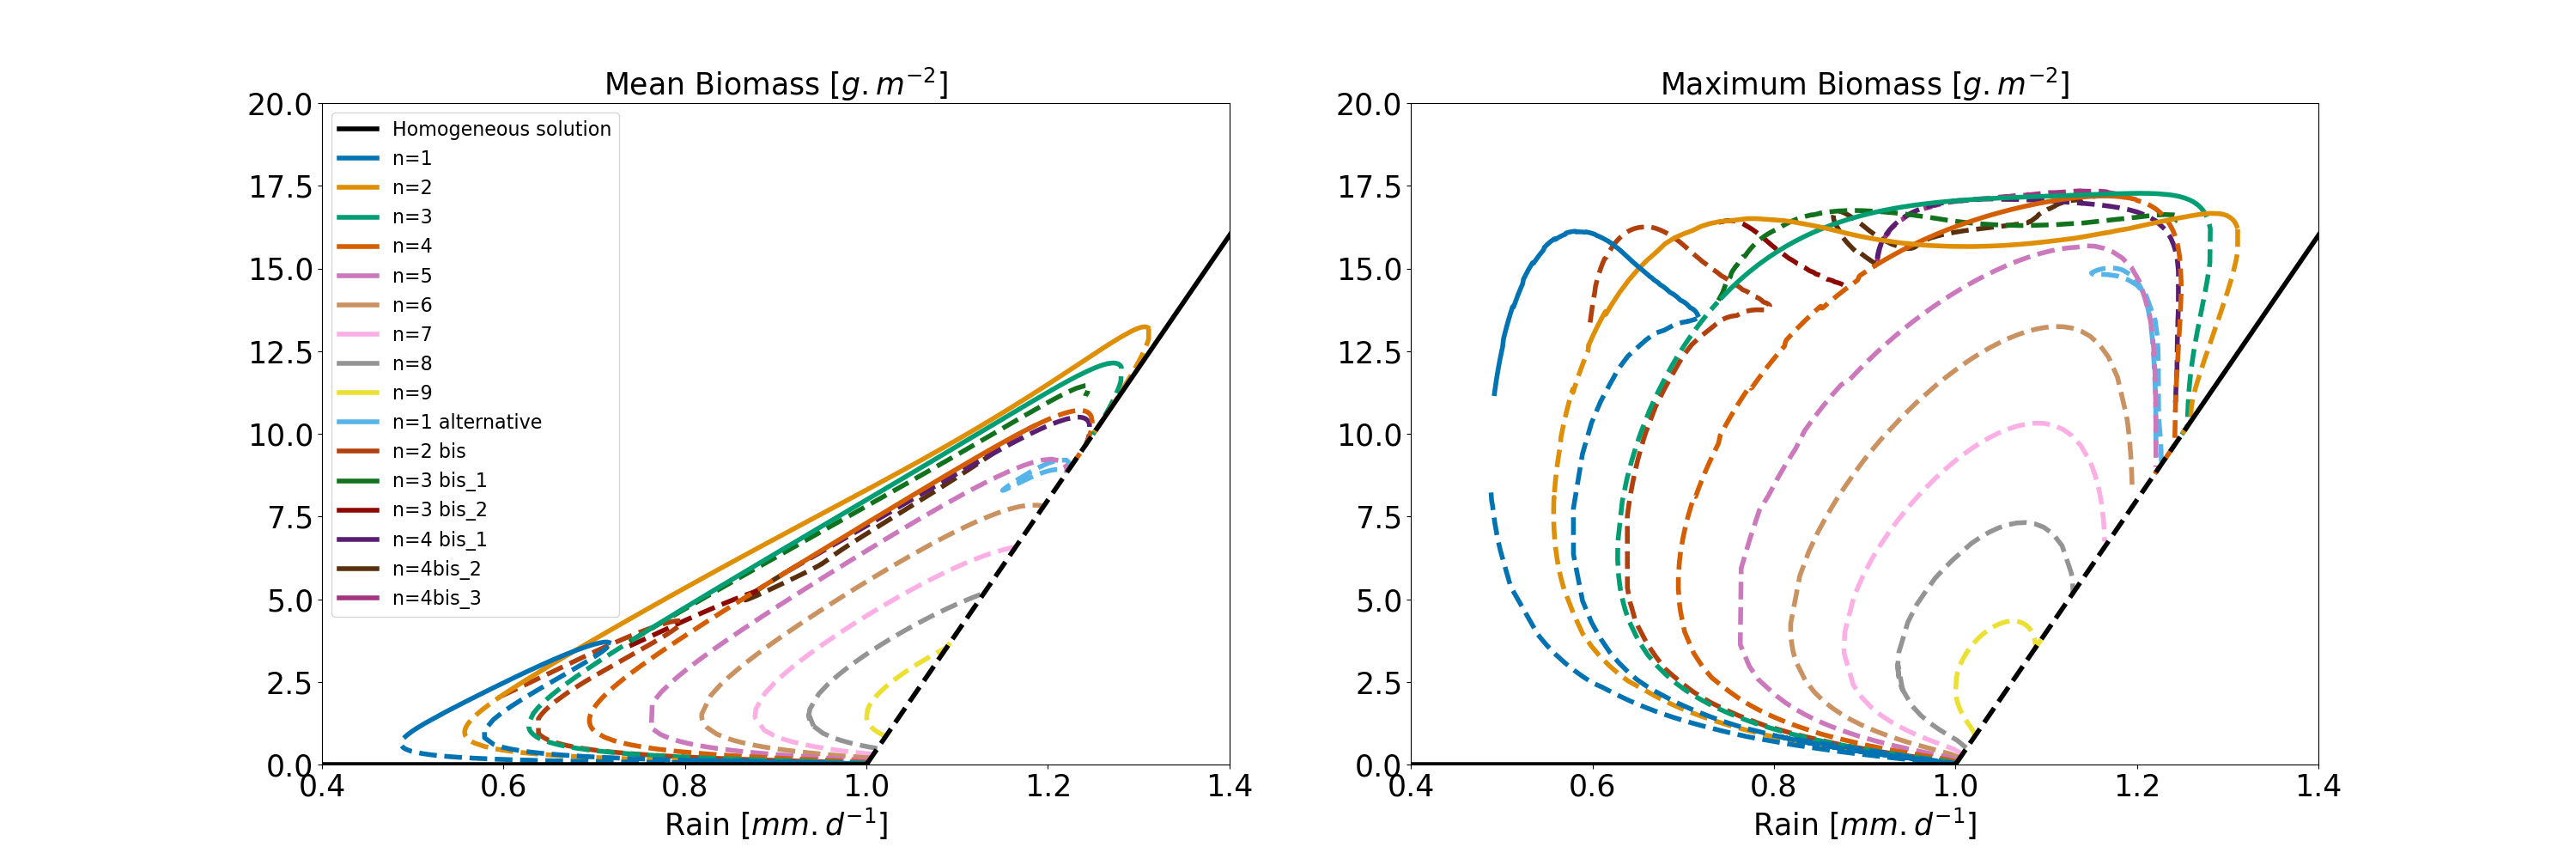

In [4]:
plt.rc('font', size=12) 
Zorder=-np.arange(0,N_mode)
fig,ax=plt.subplots(1,2,figsize=(30,10))
for i in range(N_mode):
    ax[0].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=color_mode[i],zorder=Zorder[i],linewidth=4)
    ax[0].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.mean(P_mode_tot[i],axis=1)),markersize=4,color=color_mode[i],label=name_mode[i],linestyle='solid',zorder=Zorder[i],linewidth=4)
    ax[1].plot(np.ma.masked_where(True^Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(True^Stab_mode_tot[i], np.max(P_mode_tot[i],axis=1)),linestyle='dashed',markersize=1,color=color_mode[i],zorder=Zorder[i],linewidth=4)
    ax[1].plot(np.ma.masked_where(Stab_mode_tot[i], Rains_mode_tot[i]),np.ma.masked_where(Stab_mode_tot[i], np.max(P_mode_tot[i],axis=1)),markersize=2,color=color_mode[i],label=name_mode[i],zorder=Zorder[i],linewidth=4)
ax[0].set_xlim(0.4,1.4)
ax[0].set_ylim(0,20)
ax[0].set_title('Mean Biomass $[g.m^{-2}]$',fontsize=25)
ax[0].set_xlabel('Rain $[mm.d^{-1}]$',fontsize=25)
ax[0].legend(fontsize=16)
ax[1].set_xlim(0.4,1.4)
ax[1].set_ylim(0,20)
ax[1].set_title('Maximum Biomass $[g.m^{-2}]$',fontsize=25)
ax[1].set_xlabel('Rain $[mm.d^{-1}$]',fontsize=25)
ax[0].tick_params(axis='both', which='major', labelsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25)


# Timescales

Creation timescale

$$
\tau_{creat}=\frac{k_{1}}{cg_{max}}\frac{1}{\alpha R} =[\text{d}]
$$

Rearrangement timescale

$$
\tau_{rear}=\frac{k_{1}}{cg_{max}}\frac{1}{\alpha R}\sqrt{\frac{D_{O}}{D_{B}}} =[\text{d}]
$$

# Timescales

Creation timescale

$$
\tau_{creat}=\frac{c}{k_{2}}\frac{R}{r_{w}}\frac{1}{d} = 30 \text{d}
$$

La première partie est liée au transfert d'eau vers la biomasse et la seconde partie à la destruction de la végétation

Rearrangement timescale

$$
\tau_{rear}=\frac{c}{k_{2}}\frac{R}{r_{w}}\frac{1}{d}\sqrt{\frac{D_{O}}{D_{B}}} = 1000 \text{d}
$$


In [46]:
R=0.8
print('Short timescale')
#print((param['k1'])/(param['c']*param['gmax'])*(1/param['alpha']*R))
#print((param['k1']/(param['c']*param['gmax']))/(1)*(param['alpha']/(R)))
print((param['k1']*param['d'])/(param['c']*param['gmax'])*(1/param['alpha']*R))
print((param['d'])/(param['c']*param['gmax'])*(1/param['alpha']))
print(np.sqrt((param['k1'])/(param['c']*param['gmax'])*(1/(R*param['alpha']))))
print(((param['c'])/(param['k2'])*(R))*(1/param['d'])*(1/param['rw']))


print('Rearrangement timescale')
print((param['k1'])/(param['c']*param['gmax'])*(1/(R*param['alpha']))*np.sqrt(param['DO']/param['DP']))
print((param['k1']*param['d'])/(param['c']*param['gmax'])*(1/param['alpha']*R)*np.sqrt(param['DO']/param['DP']))
print((param['k1']/(param['c']*param['gmax']))/(1)*(param['alpha']/(R))*np.sqrt(param['DO']/param['DP']))
print((param['k1']*param['d'])/(param['c']*param['gmax'])*(1/param['rw'])*np.sqrt(param['DO']/param['DP']))
print(np.sqrt((param['k1'])/(param['c']*param['gmax'])*(1/(R*param['alpha'])))*np.sqrt(param['DO']/param['DP']))
print(1/((param['k2'])/(param['c'])*(1/R))*(1/param['d'])*(1/param['rw'])*np.sqrt(param['DO']/param['DP']))
print('-----------------------')
print(np.sqrt(param['DO']/param['DP']))
print((param['DO']/param['DP'])**(3/4))

Short timescale
10.0
2.5
7.905694150420948
32.0
Rearrangement timescale
1976.4235376052368
316.2277660168379
79.05694150420948
395.2847075210474
250.0
1011.9288512538814
-----------------------
31.622776601683793
177.82794100389228


In [7]:
path='sensi_param/'
n_mode=4
f_Dw=0.1
f_Dp=0.1
f_Do=1


with open(path+"sol_n_%.d_Dw_%.4f_Dp_%.4f_Do_%.4f.txt"%(n_mode,f_Dw,f_Dp,f_Do), "rb") as fp:   
    Sol = (pickle.load(fp))
    
with open(path+'Rains.txt','rb') as fp:
    rains=pickle.load(fp)

In [8]:
n_rains=np.shape(rains)[0]
t=Sol[0][-1]


index_t_stab=np.zeros(n_rains,dtype=int)
for i in range(n_rains):
    j=100
    diff=100
    while diff>10**(-10):
        diff=np.max(np.abs(Sol[i][0][j+1,:]-Sol[i][0][j,:]))
        j=j+1
    index_t_stab[i]=int(j)


print(index_t_stab)

[1980 6548 4799 3336 2825]


[1980 6548 4799 3336 2825]
5
0
1
2
3
4


Text(0.5, 1.0, 'Biomass $[g.m^{-2}]$')

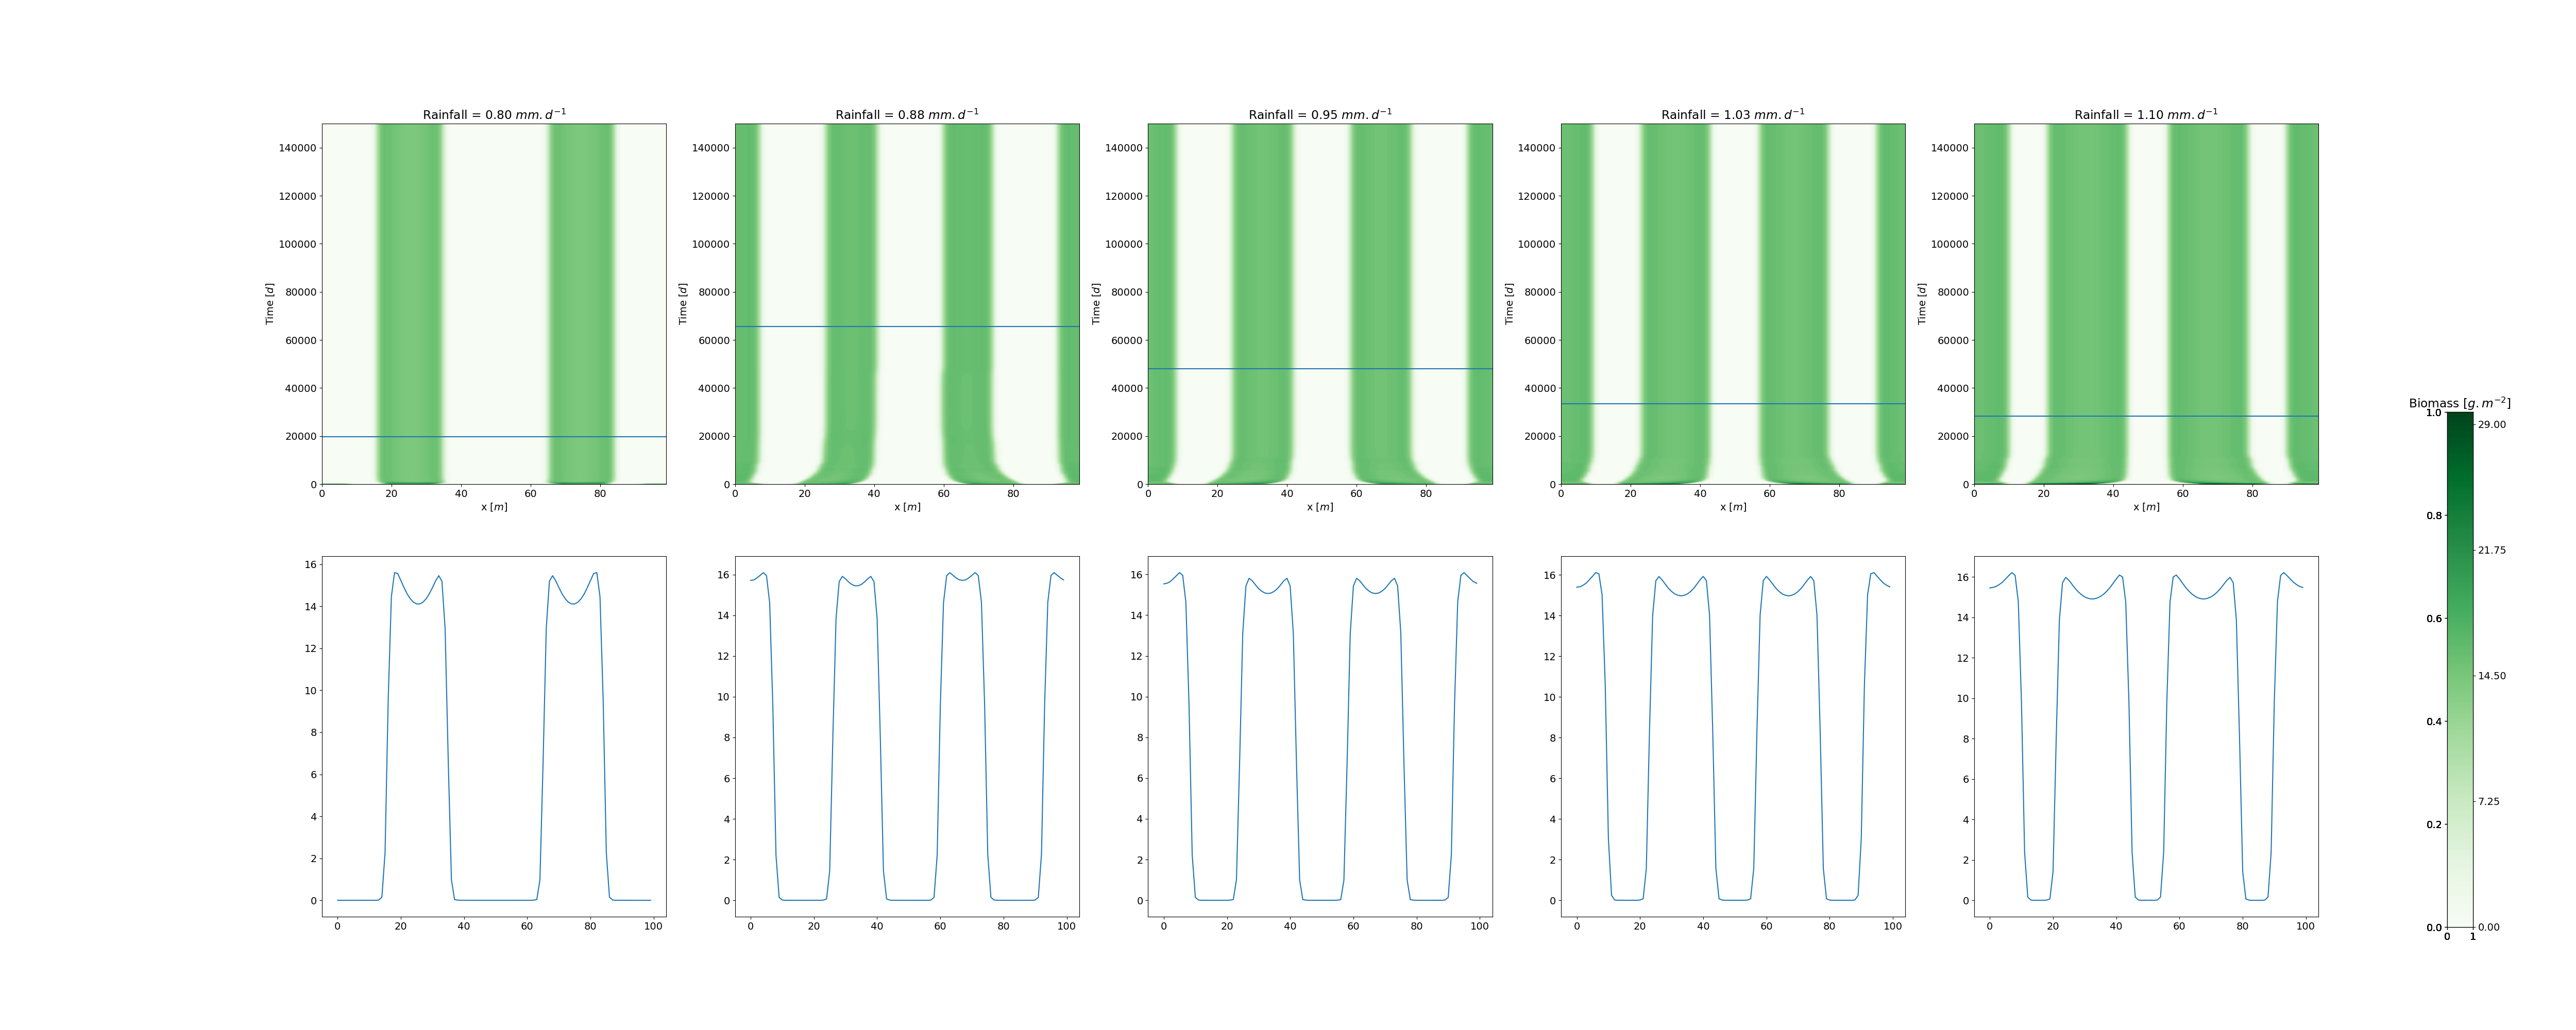

In [9]:
print(index_t_stab)
plt.rc('font', size=14) 
n_rains=np.shape(rains)[0]
t=Sol[0][-1]

print(n_rains)

fig=plt.figure(figsize=(50,20))

axs=[]
for i in range(2*n_rains):
    axs.append(fig.add_subplot(2,n_rains,i+1))

xx,tt=np.meshgrid(x,t)
c=np.linspace(-.001,np.max(np.max(Sol[-1][0])),201)
cax = plt.axes([0.95, 0.1,0.01,0.5])    
ticks_cbar=np.linspace(0,int(np.max(np.max(Sol[-1][0]))),5)
for i in range(n_rains):
    print(i)
    contB=axs[i].contourf(xx,tt,Sol[i][0],c,cmap=cm.Greens)
    cax = plt.axes([0.95, 0.1,0.01,0.5])    
    #ticks_cbar=np.linspace(0,int(np.max(np.max(Sol[i][0]))),5)
    axs[i].plot(x,np.ones(np.shape(x))*t[index_t_stab[i]])
    axs[i].set_xlabel('x $[m]$')
    axs[i].set_ylabel('Time $[d]$')
    axs[i].set_title('Rainfall = %.2f $mm.d^{-1}$'%(rains[i]))
    axs[i].set_ylim((0,150000))
    axs[i+n_rains].plot(x,Sol[i][0][index_t_stab[i],:])

cbar=plt.colorbar(contB,cax=cax,orientation='vertical',ticks=ticks_cbar)
cbar.ax.set_title('Biomass $[g.m^{-2}]$')


Text(0.5, 1.0, 'n=4')

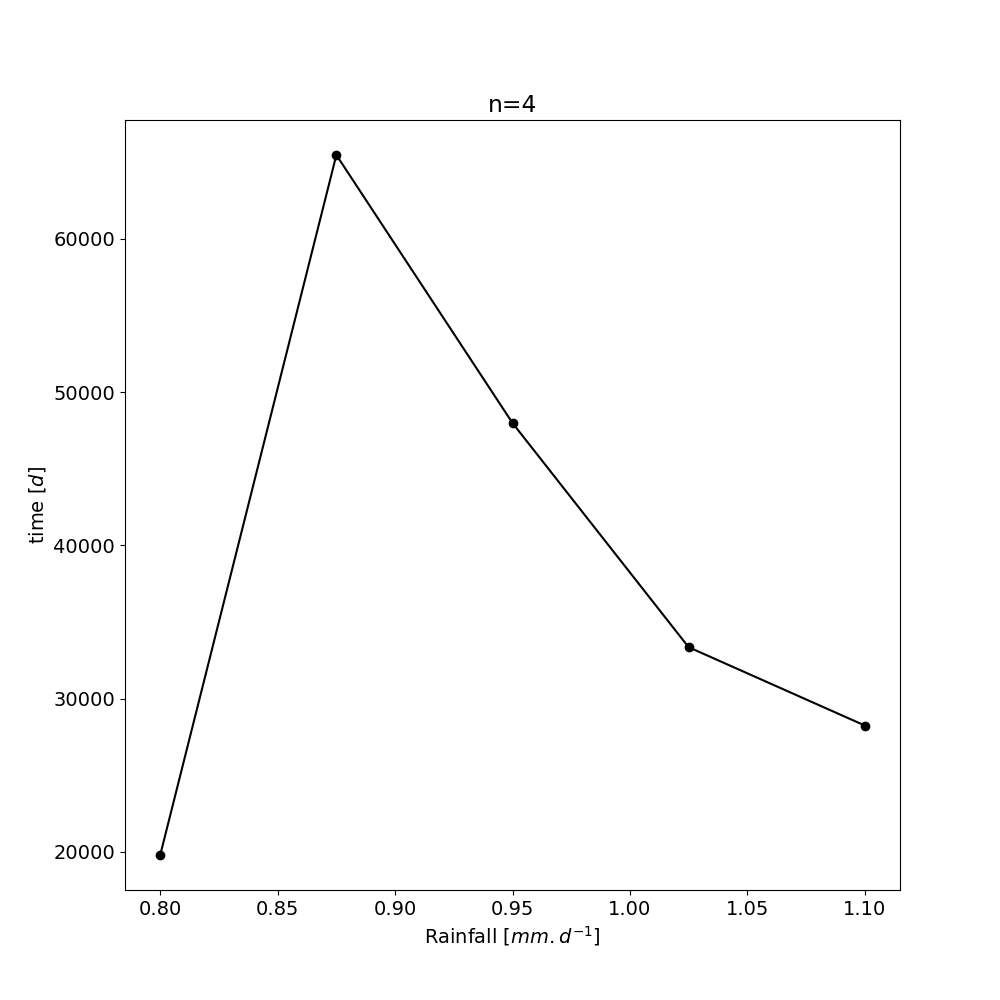

In [10]:
fig2=plt.figure(figsize=(10,10))
ax=fig2.add_subplot(1,1,1)
ax.plot(rains,t[index_t_stab],marker='o',color='black')
ax.set_xlabel('Rainfall $[mm.d^{-1}]$')
ax.set_ylabel('time $[d]$')
ax.set_title('n=%.d'%(4))
#fig2.savefig('figure/L= %.1f_TS_n=%.d_modif_2.png'%(L,n_mode))


In [11]:
path='sensi_param/'
n_mode=4
f_Dw=0.01
f_Dp=0.01
f_Do=1


with open(path+"sol_n_%.d_Dw_%.4f_Dp_%.4f_Do_%.4f.txt"%(n_mode,f_Dw,f_Dp,f_Do), "rb") as fp:   
    Sol = (pickle.load(fp))
    
with open(path+'Rains.txt','rb') as fp:
    rains=pickle.load(fp)

In [12]:
n_rains=np.shape(rains)[0]
t=Sol[0][-1]


index_t_stab=np.zeros(n_rains,dtype=int)
for i in range(n_rains):
    j=10
    diff=100
    while diff>10**(-4):
        diff=np.max(np.abs(Sol[i][0][j+1,:]-Sol[i][0][j,:]))
        j=j+1
    index_t_stab[i]=int(j)


print(index_t_stab)

[ 73  52  27 106 205]


[ 73  52  27 106 205]
5
0
1
2
3
4


Text(0.5, 1.0, 'Biomass $[g.m^{-2}]$')

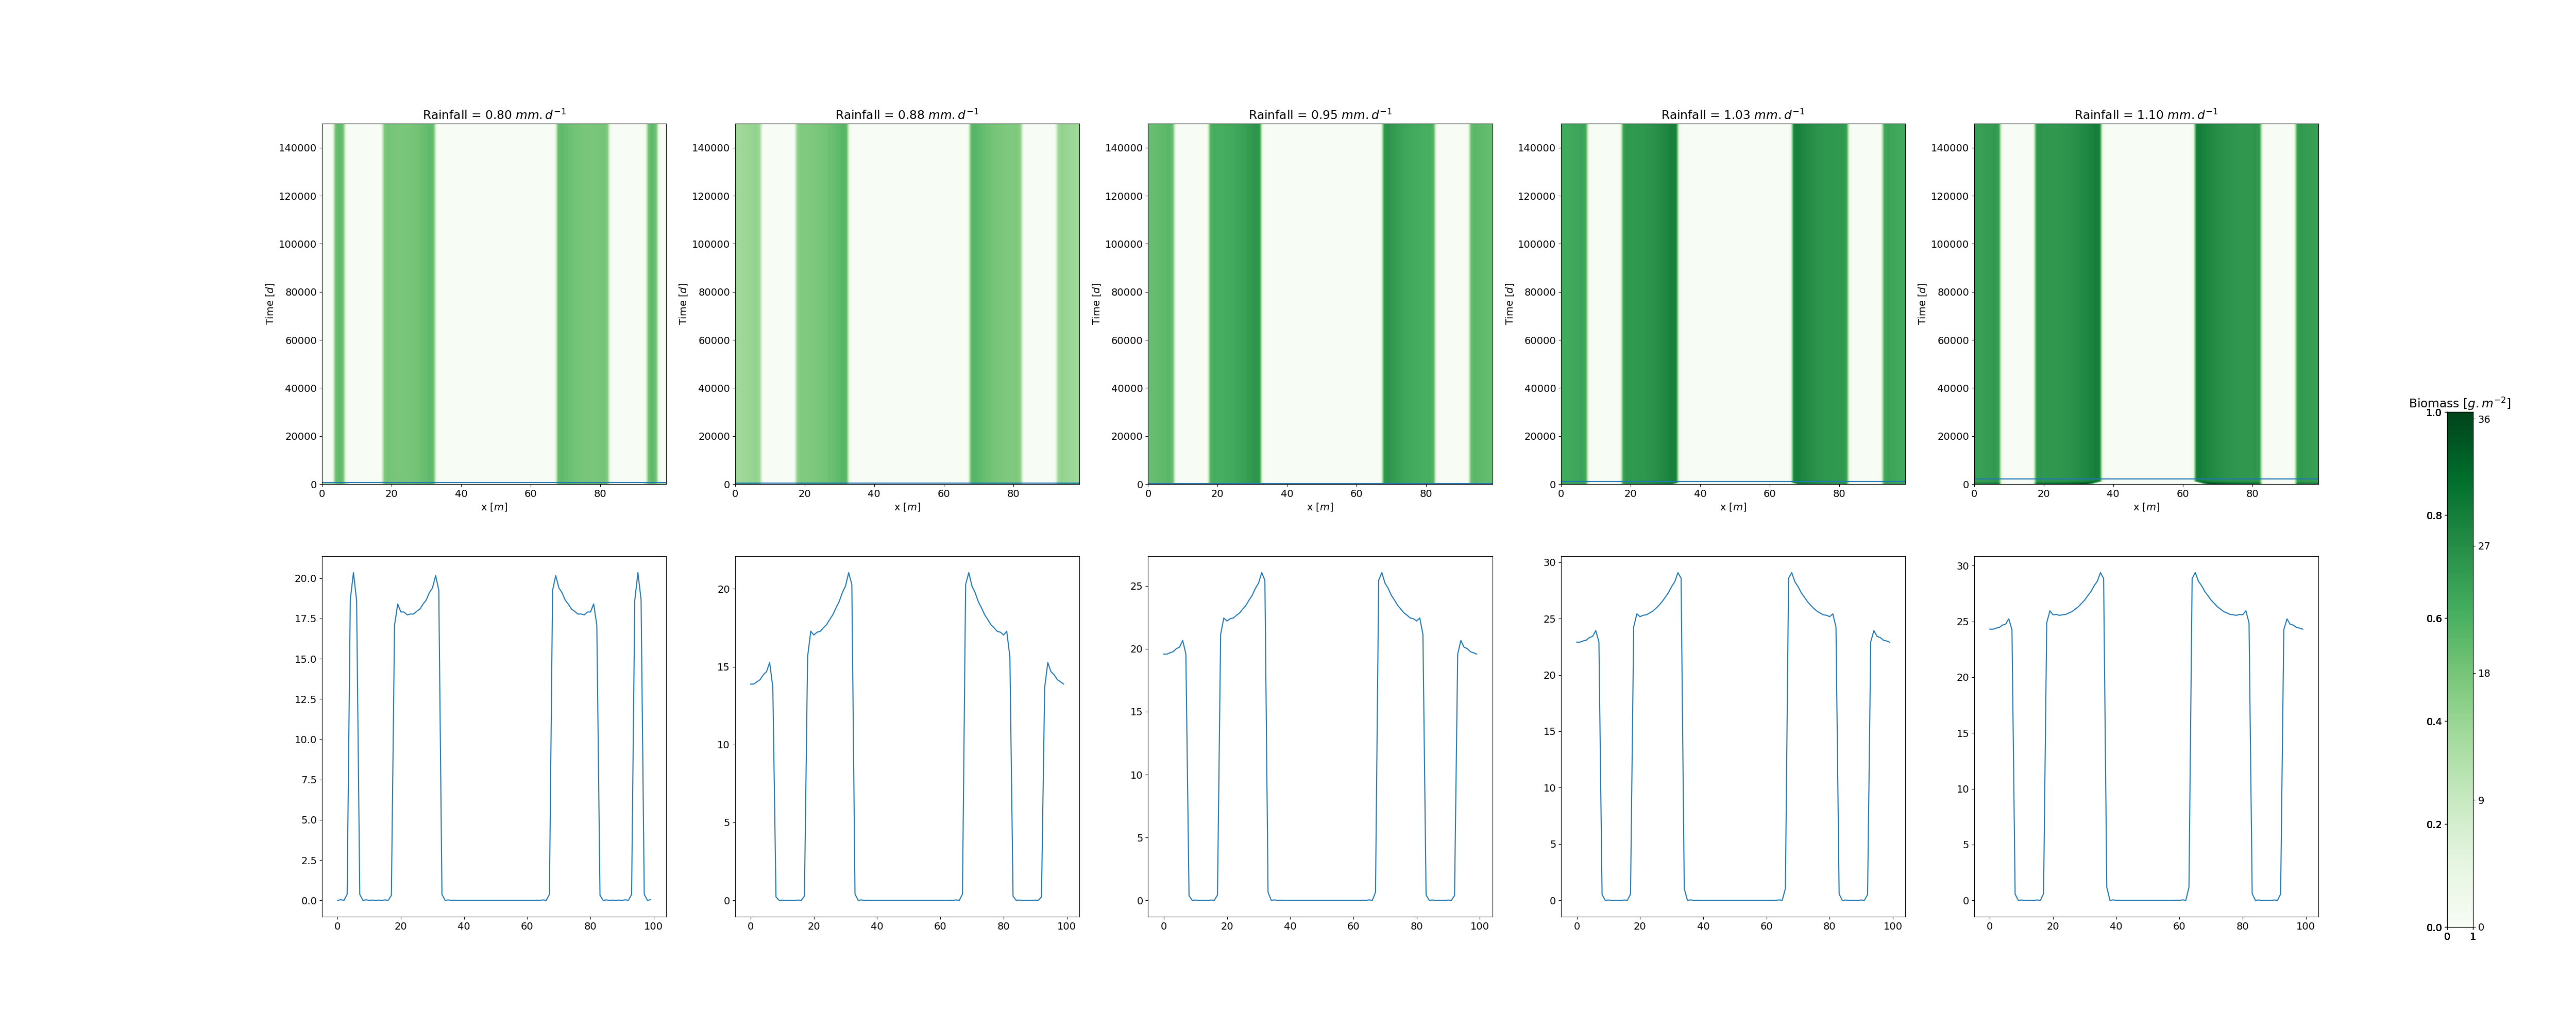

In [13]:
print(index_t_stab)
plt.rc('font', size=14) 
n_rains=np.shape(rains)[0]
t=Sol[0][-1]

print(n_rains)

fig=plt.figure(figsize=(50,20))

axs=[]
for i in range(2*n_rains):
    axs.append(fig.add_subplot(2,n_rains,i+1))

xx,tt=np.meshgrid(x,t)
c=np.linspace(-.001,np.max(np.max(Sol[-1][0])),201)
cax = plt.axes([0.95, 0.1,0.01,0.5])    
ticks_cbar=np.linspace(0,int(np.max(np.max(Sol[-1][0]))),5)
for i in range(n_rains):
    print(i)
    contB=axs[i].contourf(xx,tt,Sol[i][0],c,cmap=cm.Greens)
    cax = plt.axes([0.95, 0.1,0.01,0.5])    
    #ticks_cbar=np.linspace(0,int(np.max(np.max(Sol[i][0]))),5)
    axs[i].plot(x,np.ones(np.shape(x))*t[index_t_stab[i]])
    axs[i].set_xlabel('x $[m]$')
    axs[i].set_ylabel('Time $[d]$')
    axs[i].set_title('Rainfall = %.2f $mm.d^{-1}$'%(rains[i]))
    axs[i].set_ylim((0,150000))
    axs[i+n_rains].plot(x,Sol[i][0][index_t_stab[i],:])

cbar=plt.colorbar(contB,cax=cax,orientation='vertical',ticks=ticks_cbar)
cbar.ax.set_title('Biomass $[g.m^{-2}]$')


Text(0.5, 1.0, 'n=4')

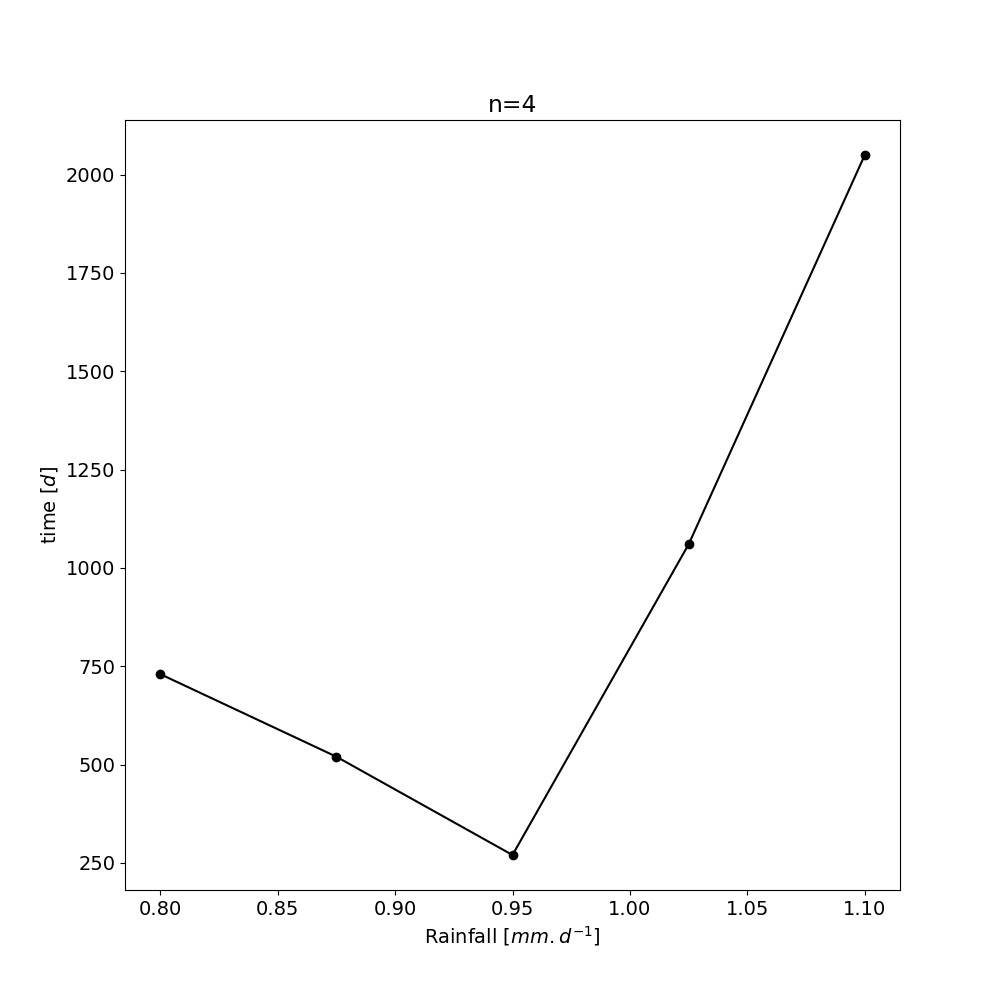

In [14]:
fig2=plt.figure(figsize=(10,10))
ax=fig2.add_subplot(1,1,1)
ax.plot(rains,t[index_t_stab],marker='o',color='black')
ax.set_xlabel('Rainfall $[mm.d^{-1}]$')
ax.set_ylabel('time $[d]$')
ax.set_title('n=%.d'%(4))
#fig2.savefig('figure/L= %.1f_TS_n=%.d_modif_2.png'%(L,n_mode))


In [15]:
path='sensi_param/'
n_mode=4
f_Dw=1
f_Dp=1
f_Do=1


with open(path+"sol_n_%.d_Dw_%.4f_Dp_%.4f_Do_%.4f.txt"%(n_mode,f_Dw,f_Dp,f_Do), "rb") as fp:   
    Sol = (pickle.load(fp))
    
with open(path+'Rains.txt','rb') as fp:
    rains=pickle.load(fp)

In [16]:
n_rains=np.shape(rains)[0]
t=Sol[0][-1]


index_t_stab=np.zeros(n_rains,dtype=int)
for i in range(n_rains):
    j=100
    diff=100
    while diff>10**(-10):
        diff=np.max(np.abs(Sol[i][0][j+1,:]-Sol[i][0][j,:]))
        j=j+1
    index_t_stab[i]=int(j)


print(index_t_stab)

[1562 1030  750 3060 3449]


[1562 1030  750 3060 3449]
5
0
1
2
3
4


Text(0.5, 1.0, 'Biomass $[g.m^{-2}]$')

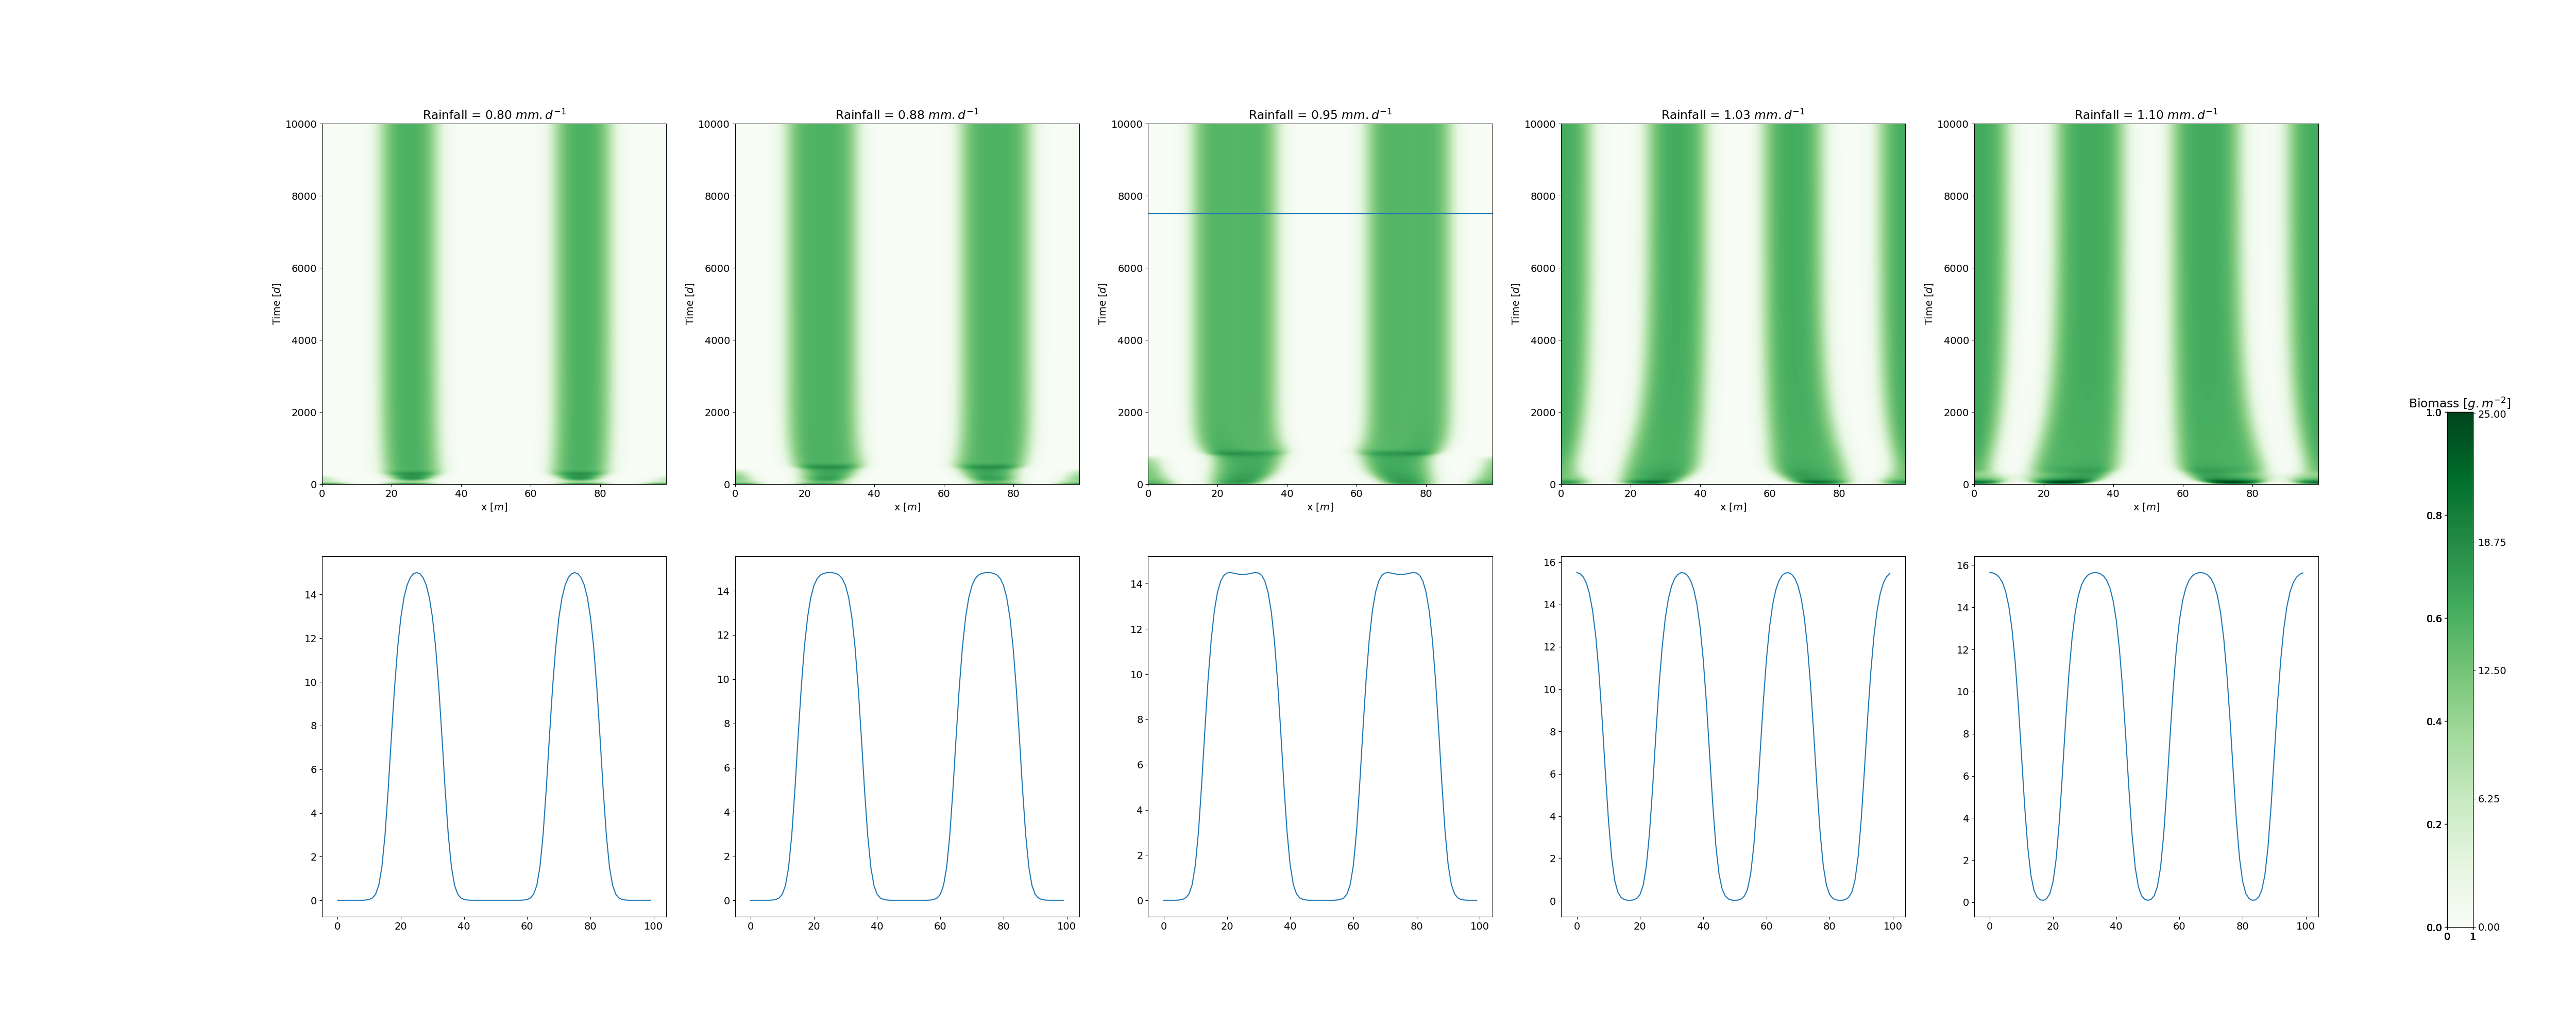

In [17]:
print(index_t_stab)
plt.rc('font', size=14) 
n_rains=np.shape(rains)[0]
t=Sol[0][-1]

print(n_rains)

fig=plt.figure(figsize=(50,20))

axs=[]
for i in range(2*n_rains):
    axs.append(fig.add_subplot(2,n_rains,i+1))

xx,tt=np.meshgrid(x,t)
c=np.linspace(-.001,np.max(np.max(Sol[-1][0])),201)
cax = plt.axes([0.95, 0.1,0.01,0.5])    
ticks_cbar=np.linspace(0,int(np.max(np.max(Sol[-1][0]))),5)
for i in range(n_rains):
    print(i)
    contB=axs[i].contourf(xx,tt,Sol[i][0],c,cmap=cm.Greens)
    cax = plt.axes([0.95, 0.1,0.01,0.5])    
    #ticks_cbar=np.linspace(0,int(np.max(np.max(Sol[i][0]))),5)
    axs[i].plot(x,np.ones(np.shape(x))*t[index_t_stab[i]])
    axs[i].set_xlabel('x $[m]$')
    axs[i].set_ylabel('Time $[d]$')
    axs[i].set_title('Rainfall = %.2f $mm.d^{-1}$'%(rains[i]))
    axs[i].set_ylim((0,10000))
    axs[i+n_rains].plot(x,Sol[i][0][index_t_stab[i],:])

cbar=plt.colorbar(contB,cax=cax,orientation='vertical',ticks=ticks_cbar)
cbar.ax.set_title('Biomass $[g.m^{-2}]$')


Text(0.5, 1.0, 'n=4')

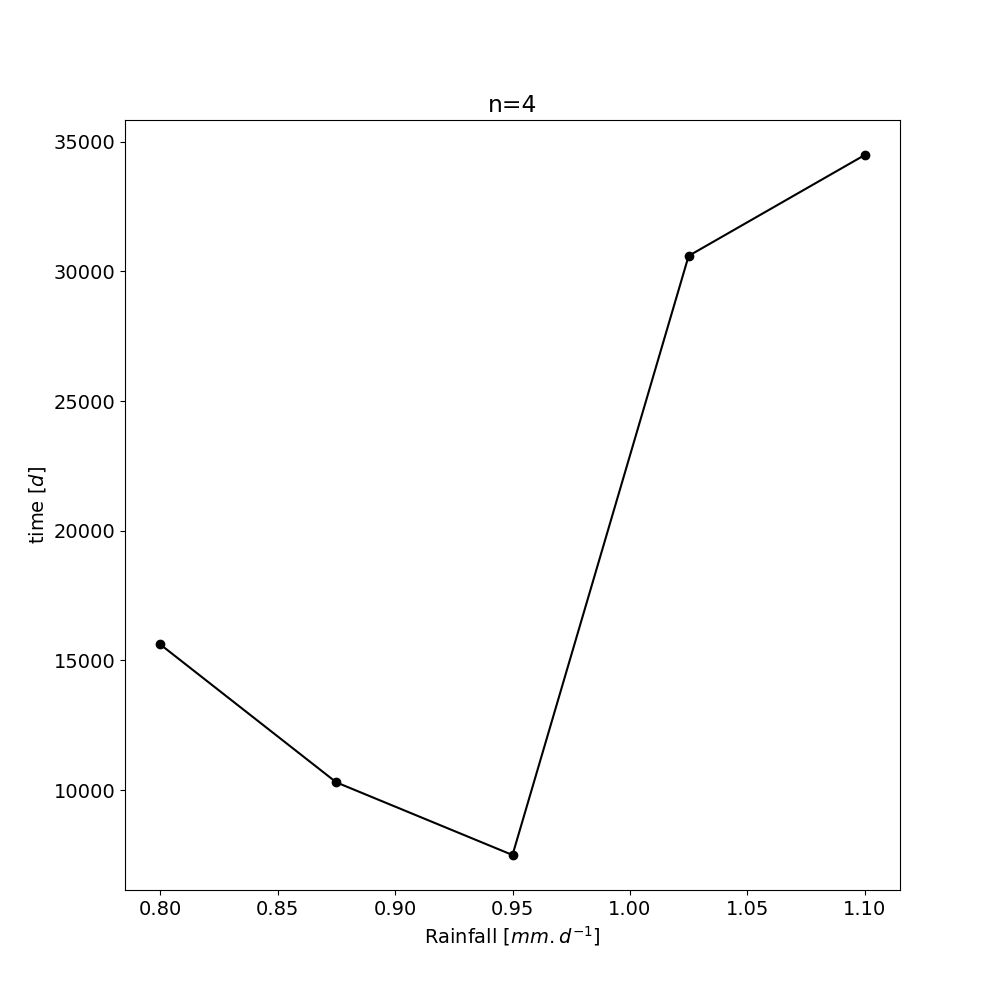

In [18]:
fig2=plt.figure(figsize=(10,10))
ax=fig2.add_subplot(1,1,1)
ax.plot(rains,t[index_t_stab],marker='o',color='black')
ax.set_xlabel('Rainfall $[mm.d^{-1}]$')
ax.set_ylabel('time $[d]$')
ax.set_title('n=%.d'%(4))
#fig2.savefig('figure/L= %.1f_TS_n=%.d_modif_2.png'%(L,n_mode))


In [5]:
path='sensi_param/'
n_mode=4
f_Dw=1
f_Dp=1
f_Do=10


with open(path+"sol_n_%.d_Dw_%.4f_Dp_%.4f_Do_%.4f.txt"%(n_mode,f_Dw,f_Dp,f_Do), "rb") as fp:   
    Sol = (pickle.load(fp))
    
with open(path+'Rains.txt','rb') as fp:
    rains=pickle.load(fp)

In [6]:
n_rains=np.shape(rains)[0]
t=Sol[0][-1]


index_t_stab=np.zeros(n_rains,dtype=int)
for i in range(n_rains):
    j=100
    diff=100
    while diff>10**(-10):
        diff=np.max(np.abs(Sol[i][0][j+1,:]-Sol[i][0][j,:]))
        j=j+1
    index_t_stab[i]=int(j)


print(index_t_stab)

[101 145 264 118 101]


[101 145 264 118 101]
5
0
1
2
3
4


Text(0.5, 1.0, 'Biomass $[g.m^{-2}]$')

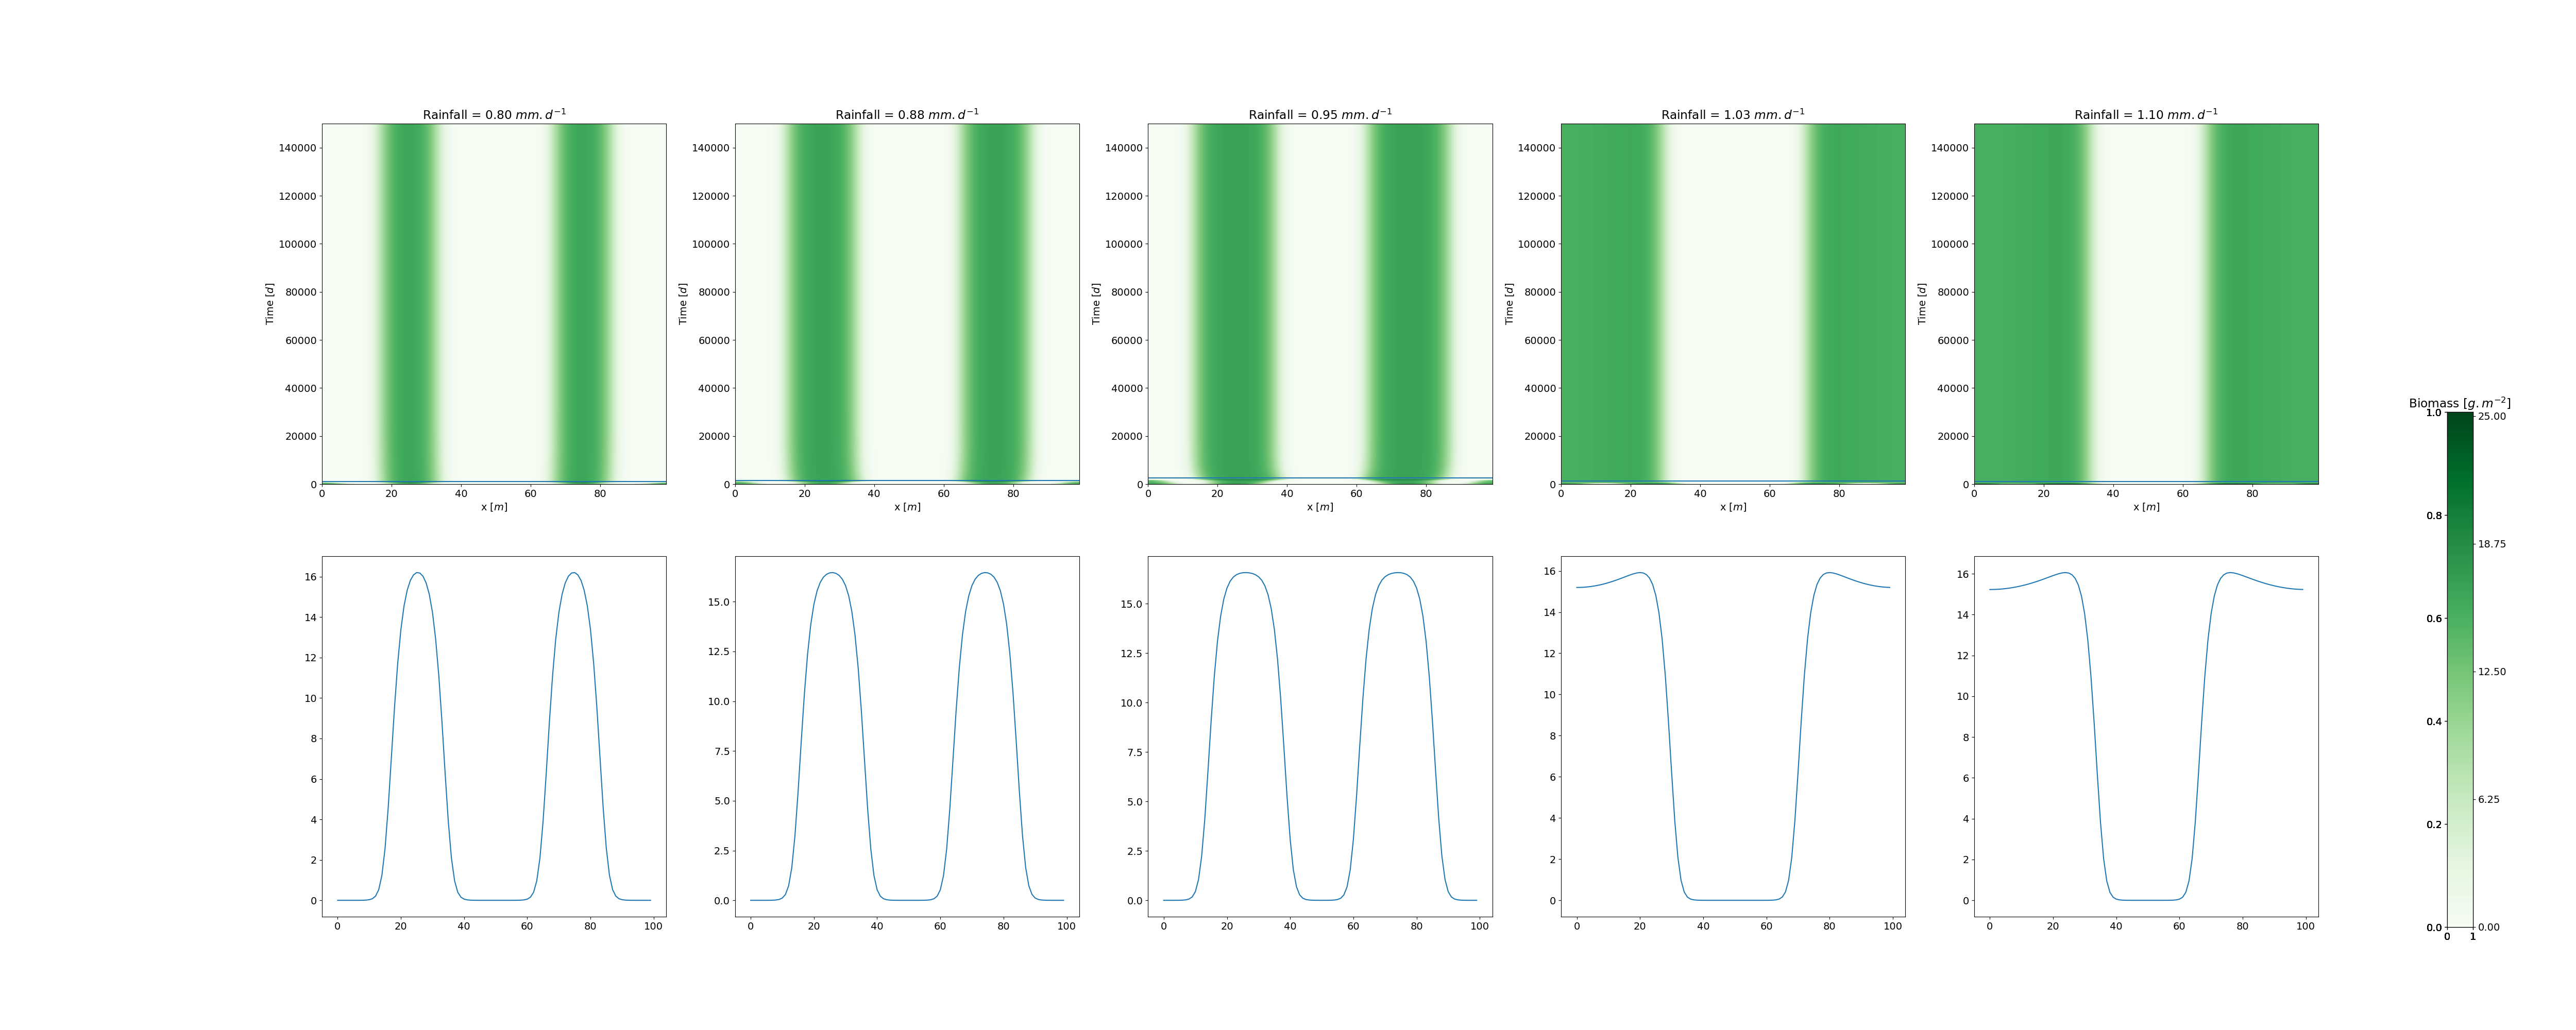

In [7]:
print(index_t_stab)
plt.rc('font', size=14) 
n_rains=np.shape(rains)[0]
t=Sol[0][-1]

print(n_rains)

fig=plt.figure(figsize=(50,20))

axs=[]
for i in range(2*n_rains):
    axs.append(fig.add_subplot(2,n_rains,i+1))

xx,tt=np.meshgrid(x,t)
c=np.linspace(-.001,np.max(np.max(Sol[-1][0])),201)
cax = plt.axes([0.95, 0.1,0.01,0.5])    
ticks_cbar=np.linspace(0,int(np.max(np.max(Sol[-1][0]))),5)
for i in range(n_rains):
    print(i)
    contB=axs[i].contourf(xx,tt,Sol[i][0],c,cmap=cm.Greens)
    cax = plt.axes([0.95, 0.1,0.01,0.5])    
    #ticks_cbar=np.linspace(0,int(np.max(np.max(Sol[i][0]))),5)
    axs[i].plot(x,np.ones(np.shape(x))*t[index_t_stab[i]])
    axs[i].set_xlabel('x $[m]$')
    axs[i].set_ylabel('Time $[d]$')
    axs[i].set_title('Rainfall = %.2f $mm.d^{-1}$'%(rains[i]))
    axs[i].set_ylim((0,150000))
    axs[i+n_rains].plot(x,Sol[i][0][index_t_stab[i],:])

cbar=plt.colorbar(contB,cax=cax,orientation='vertical',ticks=ticks_cbar)
cbar.ax.set_title('Biomass $[g.m^{-2}]$')


Text(0.5, 1.0, 'n=4')

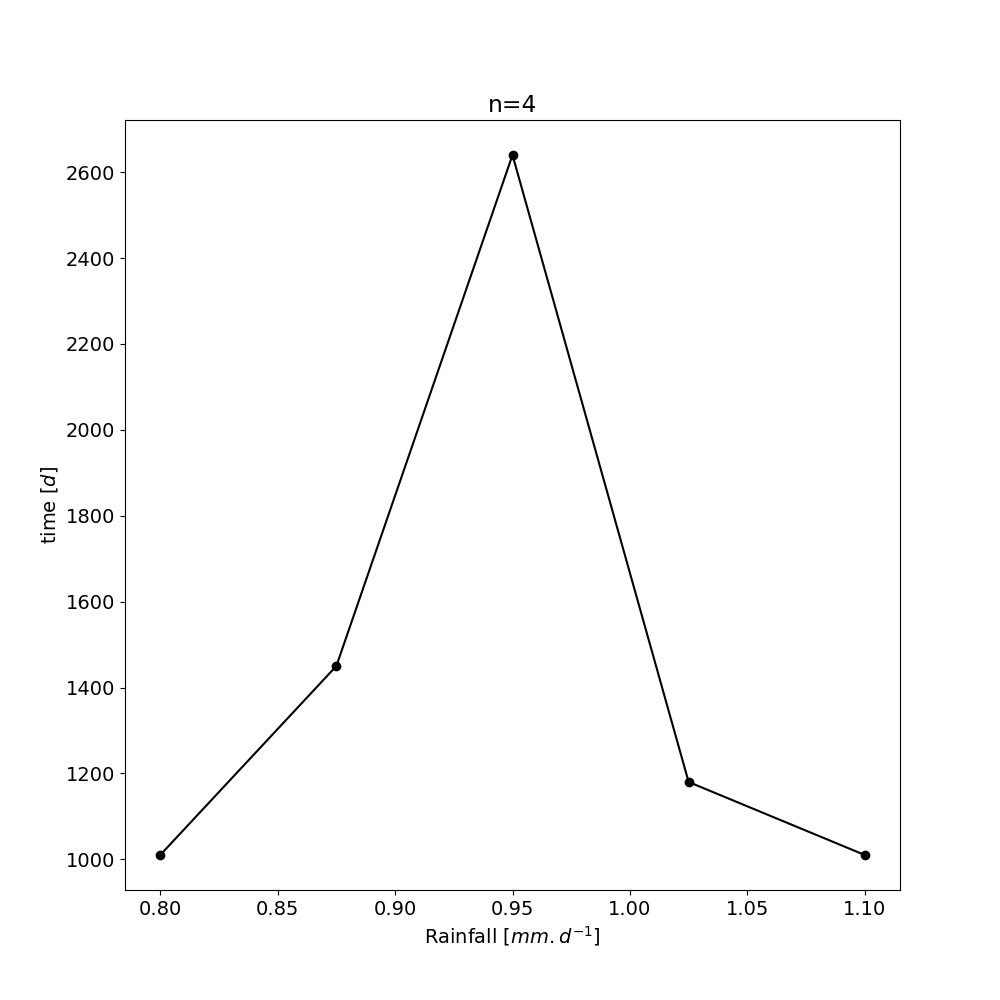

In [8]:
fig2=plt.figure(figsize=(10,10))
ax=fig2.add_subplot(1,1,1)
ax.plot(rains,t[index_t_stab],marker='o',color='black')
ax.set_xlabel('Rainfall $[mm.d^{-1}]$')
ax.set_ylabel('time $[d]$')
ax.set_title('n=%.d'%(4))
#fig2.savefig('figure/L= %.1f_TS_n=%.d_modif_2.png'%(L,n_mode))


In [21]:
path='sensi_param/'
n_mode=4
f_Dw=1
f_Dp=1
f_Do=100


with open(path+"sol_n_%.d_Dw_%.4f_Dp_%.4f_Do_%.4f.txt"%(n_mode,f_Dw,f_Dp,f_Do), "rb") as fp:   
    Sol = (pickle.load(fp))
    
with open(path+'Rains.txt','rb') as fp:
    rains=pickle.load(fp)

In [22]:
n_rains=np.shape(rains)[0]
t=Sol[0][-1]


index_t_stab=np.zeros(n_rains,dtype=int)
for i in range(n_rains):
    j=100
    diff=100
    while diff>10**(-2):
        diff=np.max(np.abs(Sol[i][0][j+1,:]-Sol[i][0][j,:]))
        j=j+1
    index_t_stab[i]=int(j)


print(index_t_stab)

[ 737 1103  101  101  101]


[ 737 1103  101  101  101]
5
0
1
2
3
4


Text(0.5, 1.0, 'Biomass $[g.m^{-2}]$')

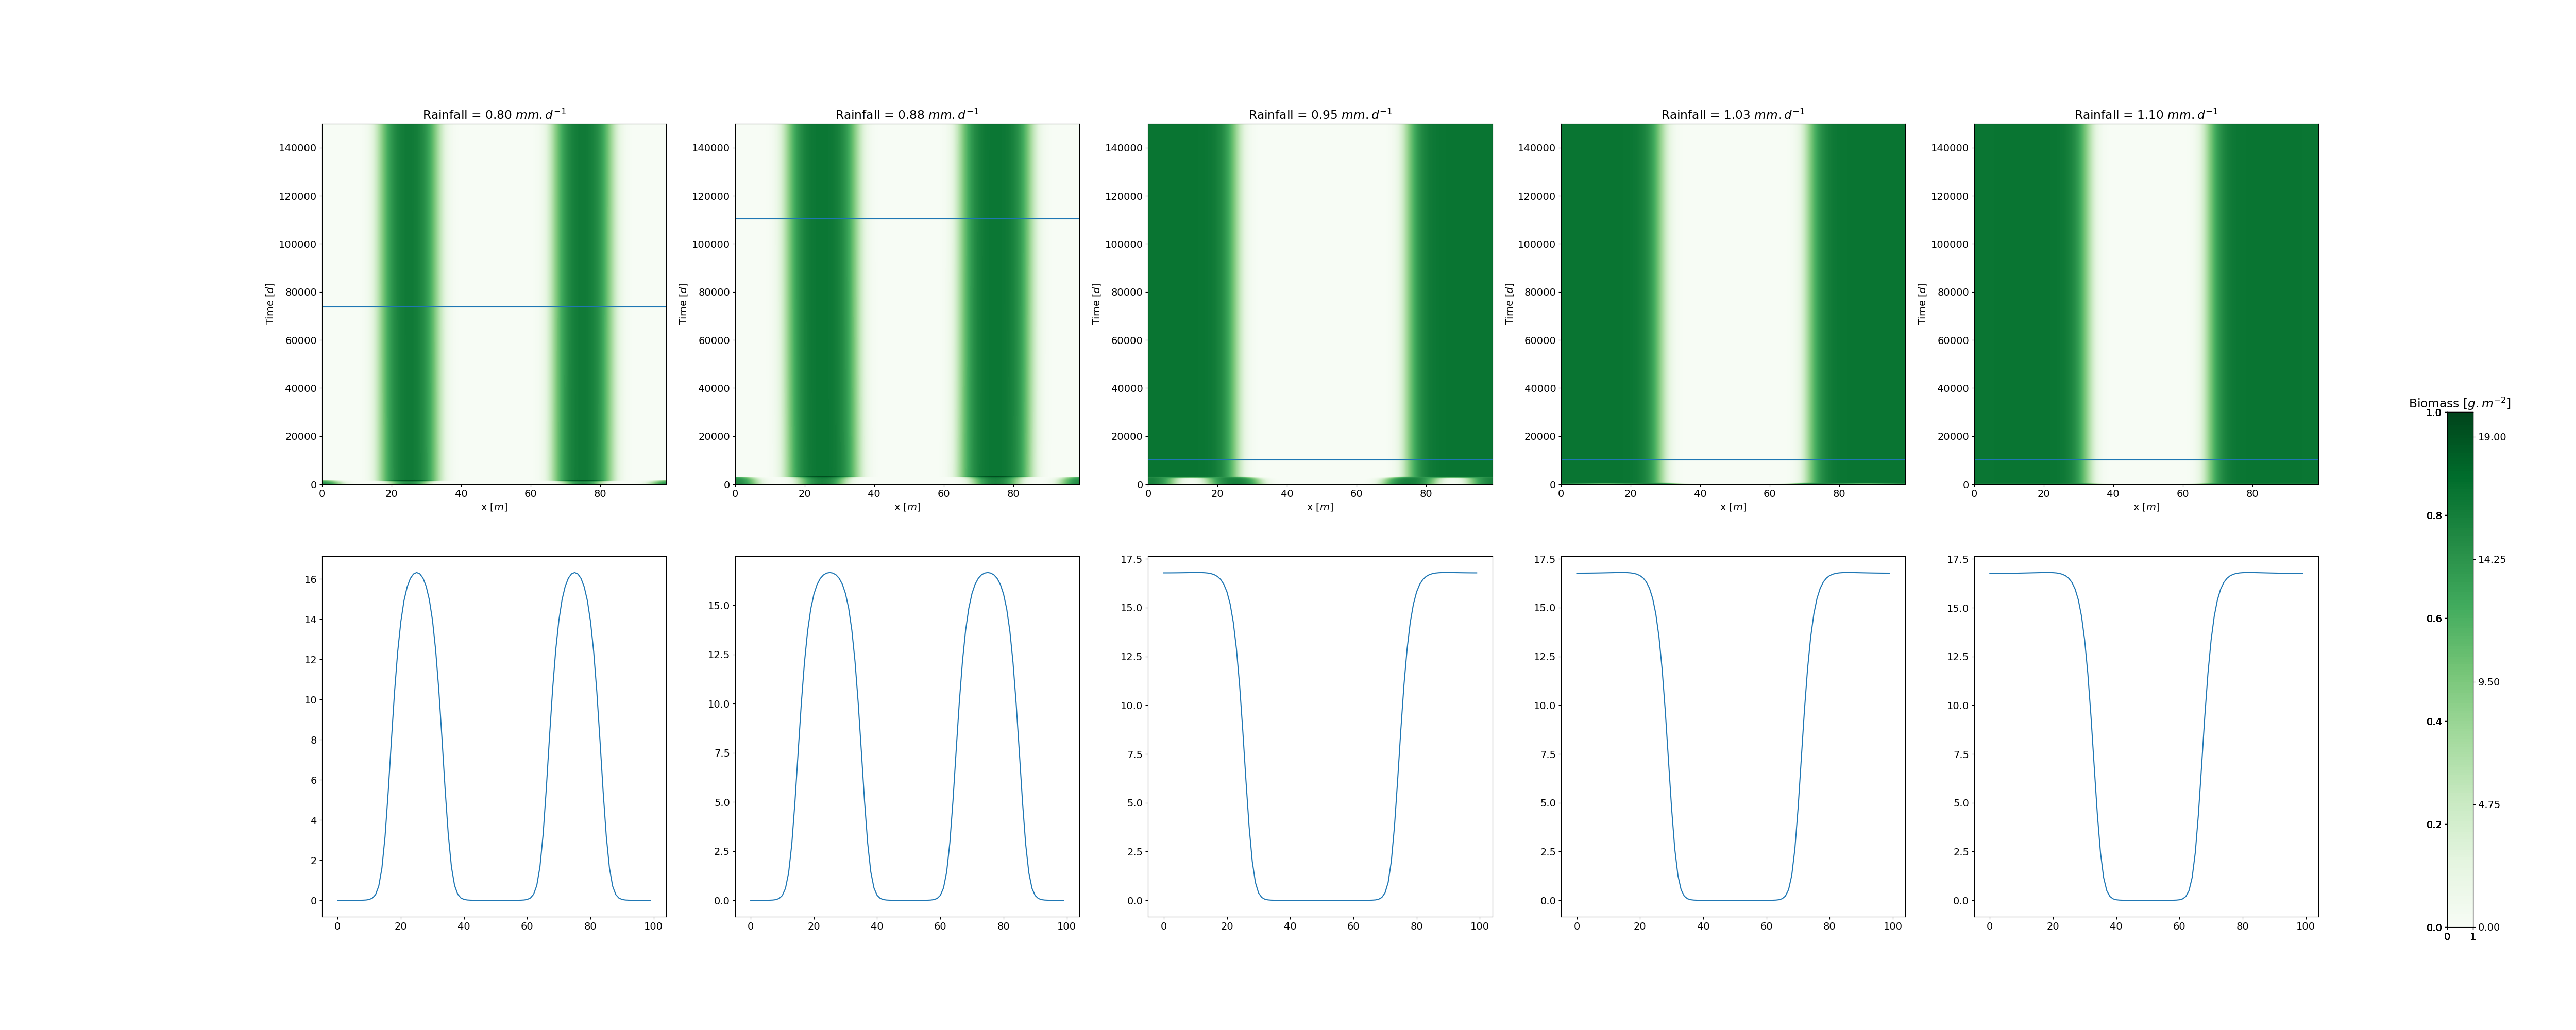

In [23]:
print(index_t_stab)
plt.rc('font', size=14) 
n_rains=np.shape(rains)[0]
t=Sol[0][-1]

print(n_rains)

fig=plt.figure(figsize=(50,20))

axs=[]
for i in range(2*n_rains):
    axs.append(fig.add_subplot(2,n_rains,i+1))

xx,tt=np.meshgrid(x,t)
c=np.linspace(-.001,np.max(np.max(Sol[-1][0])),201)
cax = plt.axes([0.95, 0.1,0.01,0.5])    
ticks_cbar=np.linspace(0,int(np.max(np.max(Sol[-1][0]))),5)
for i in range(n_rains):
    print(i)
    contB=axs[i].contourf(xx,tt,Sol[i][0],c,cmap=cm.Greens)
    cax = plt.axes([0.95, 0.1,0.01,0.5])    
    #ticks_cbar=np.linspace(0,int(np.max(np.max(Sol[i][0]))),5)
    axs[i].plot(x,np.ones(np.shape(x))*t[index_t_stab[i]])
    axs[i].set_xlabel('x $[m]$')
    axs[i].set_ylabel('Time $[d]$')
    axs[i].set_title('Rainfall = %.2f $mm.d^{-1}$'%(rains[i]))
    axs[i].set_ylim((0,150000))
    axs[i+n_rains].plot(x,Sol[i][0][index_t_stab[i],:])

cbar=plt.colorbar(contB,cax=cax,orientation='vertical',ticks=ticks_cbar)
cbar.ax.set_title('Biomass $[g.m^{-2}]$')


Text(0.5, 1.0, 'n=4')

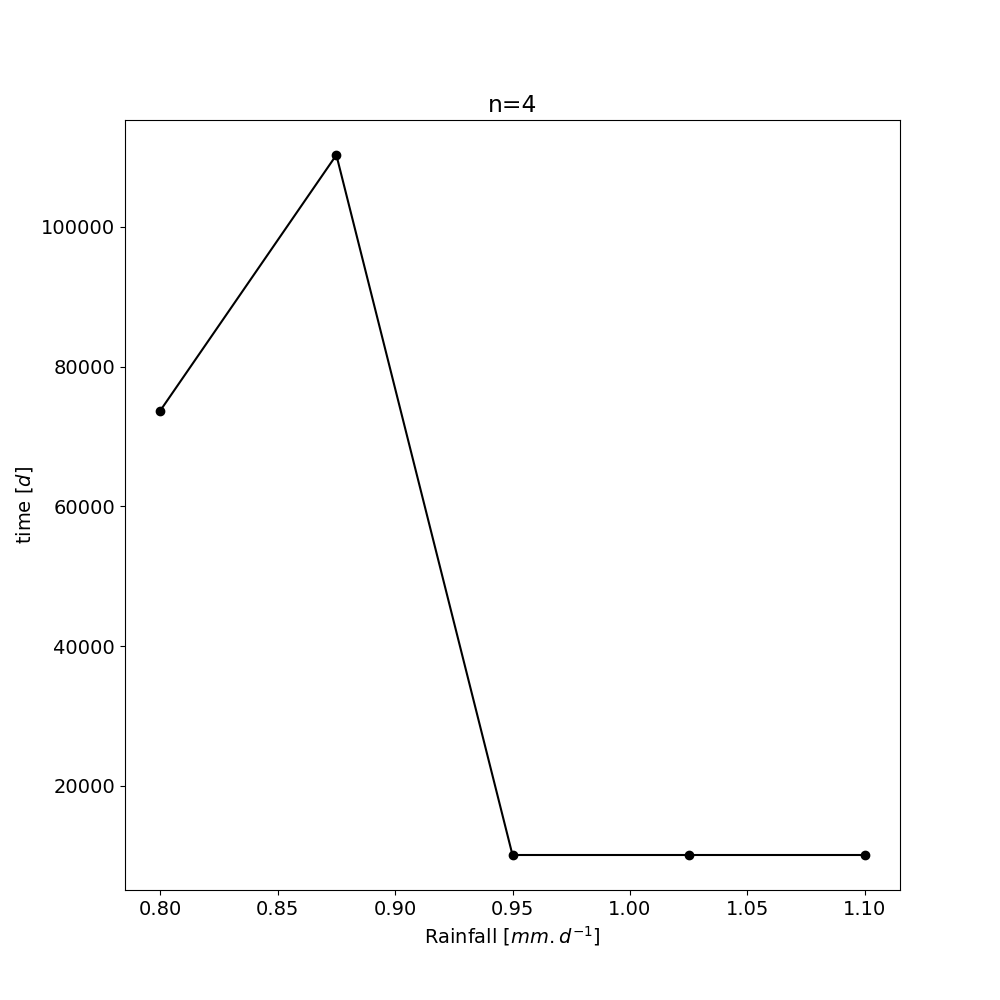

In [24]:
fig2=plt.figure(figsize=(10,10))
ax=fig2.add_subplot(1,1,1)
ax.plot(rains,t[index_t_stab],marker='o',color='black')
ax.set_xlabel('Rainfall $[mm.d^{-1}]$')
ax.set_ylabel('time $[d]$')
ax.set_title('n=%.d'%(4))
#fig2.savefig('figure/L= %.1f_TS_n=%.d_modif_2.png'%(L,n_mode))


In [8]:
path='sensi_param/'
n_mode=4
f_Dw=0.1
f_Dp=0.1
f_Do=10


with open(path+"sol_n_%.d_Dw_%.4f_Dp_%.4f_Do_%.4f.txt"%(n_mode,f_Dw,f_Dp,f_Do), "rb") as fp:   
    Sol = (pickle.load(fp))
    
with open(path+'Rains.txt','rb') as fp:
    rains=pickle.load(fp)

In [12]:
n_rains=np.shape(rains)[0]
t=Sol[0][-1]


index_t_stab=np.zeros(n_rains,dtype=int)
for i in range(n_rains):
    j=100
    diff=100
    while diff>10**(-10):
        diff=np.max(np.abs(Sol[i][0][j+1,:]-Sol[i][0][j,:]))
        j=j+1
    index_t_stab[i]=int(j)


print(index_t_stab)

[ 5640  5266  3635  6949 38642]


[ 5640  5266  3635  6949 38642]
5
0
1
2
3
4


Text(0.5, 1.0, 'Biomass $[g.m^{-2}]$')

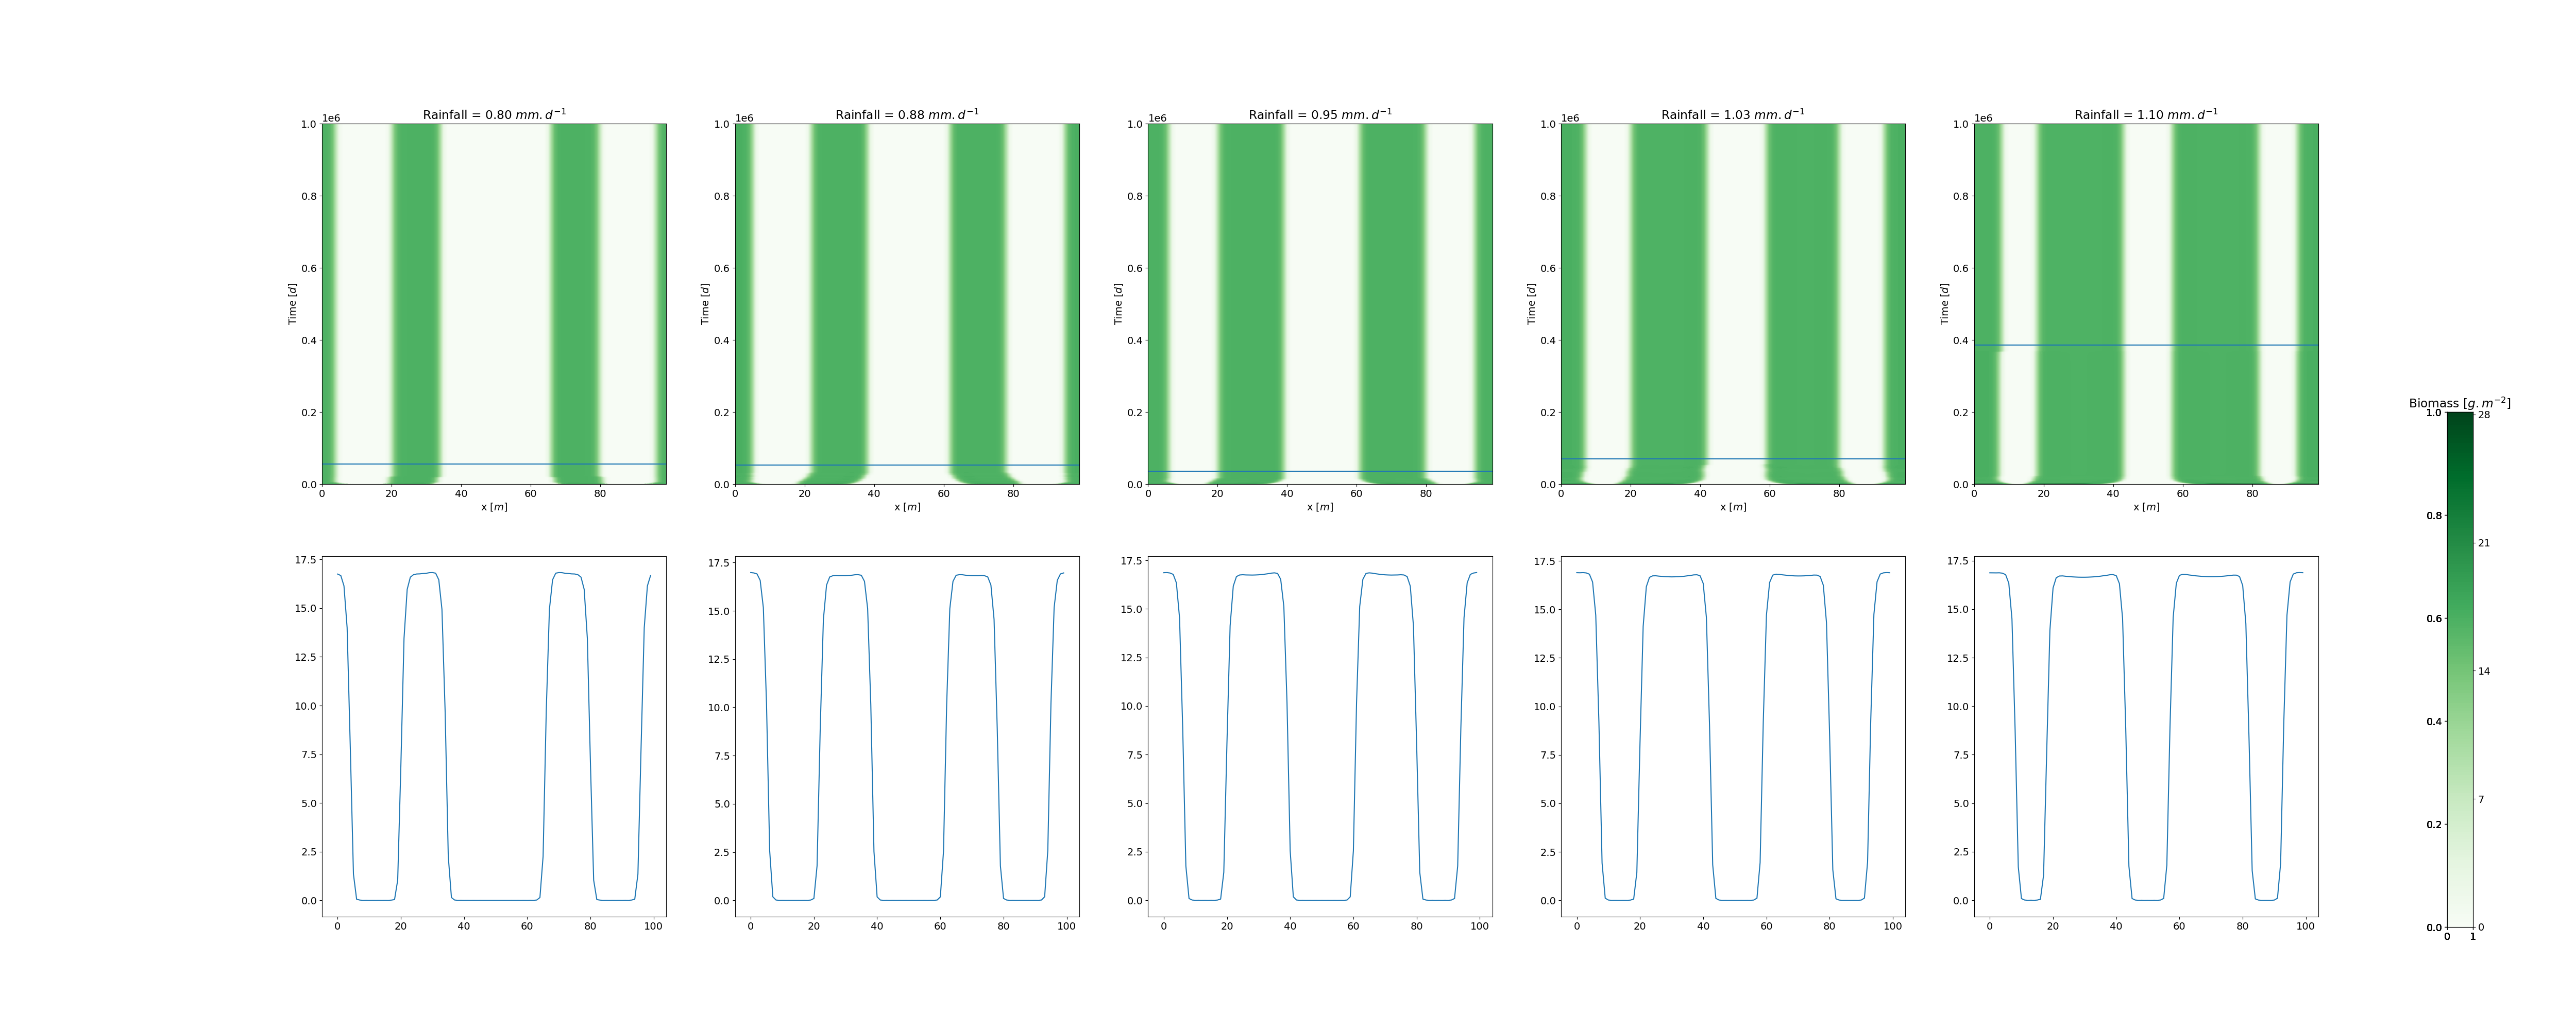

In [13]:
print(index_t_stab)
plt.rc('font', size=14) 
n_rains=np.shape(rains)[0]
t=Sol[0][-1]

print(n_rains)

fig=plt.figure(figsize=(50,20))

axs=[]
for i in range(2*n_rains):
    axs.append(fig.add_subplot(2,n_rains,i+1))

xx,tt=np.meshgrid(x,t)
c=np.linspace(-.001,np.max(np.max(Sol[-1][0])),201)
cax = plt.axes([0.95, 0.1,0.01,0.5])    
ticks_cbar=np.linspace(0,int(np.max(np.max(Sol[-1][0]))),5)
for i in range(n_rains):
    print(i)
    contB=axs[i].contourf(xx,tt,Sol[i][0],c,cmap=cm.Greens)
    cax = plt.axes([0.95, 0.1,0.01,0.5])    
    #ticks_cbar=np.linspace(0,int(np.max(np.max(Sol[i][0]))),5)
    axs[i].plot(x,np.ones(np.shape(x))*t[index_t_stab[i]])
    axs[i].set_xlabel('x $[m]$')
    axs[i].set_ylabel('Time $[d]$')
    axs[i].set_title('Rainfall = %.2f $mm.d^{-1}$'%(rains[i]))
    #axs[i].set_ylim((0,150000))
    axs[i+n_rains].plot(x,Sol[i][0][index_t_stab[i],:])

cbar=plt.colorbar(contB,cax=cax,orientation='vertical',ticks=ticks_cbar)
cbar.ax.set_title('Biomass $[g.m^{-2}]$')


Text(0.5, 1.0, 'n=4')

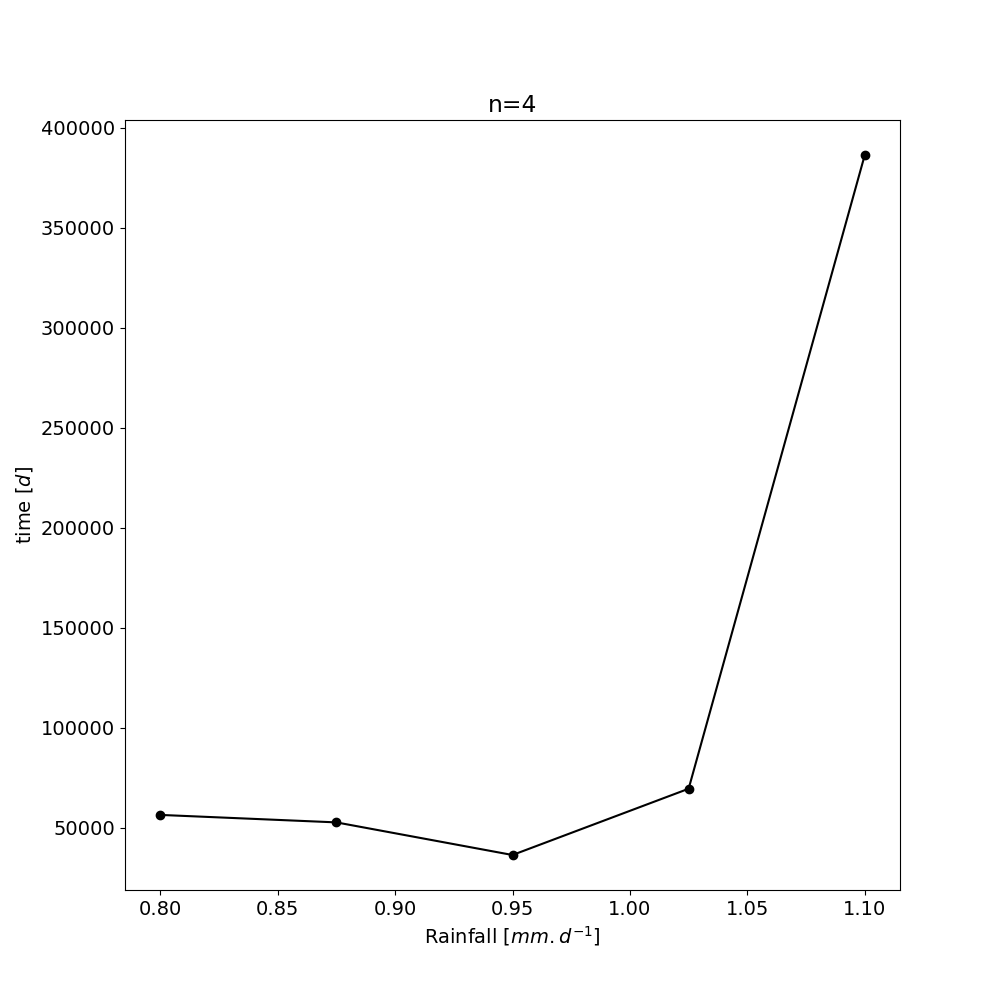

In [14]:
fig2=plt.figure(figsize=(10,10))
ax=fig2.add_subplot(1,1,1)
ax.plot(rains,t[index_t_stab],marker='o',color='black')
ax.set_xlabel('Rainfall $[mm.d^{-1}]$')
ax.set_ylabel('time $[d]$')
ax.set_title('n=%.d'%(4))
#fig2.savefig('figure/L= %.1f_TS_n=%.d_modif_2.png'%(L,n_mode))


In [5]:
path='sensi_param/'
n_mode=4
f_Dw=0.2
f_Dp=0.2
f_Do=1


with open(path+"sol_n_%.d_Dw_%.4f_Dp_%.4f_Do_%.4f.txt"%(n_mode,f_Dw,f_Dp,f_Do), "rb") as fp:   
    Sol = (pickle.load(fp))
    
with open(path+'Rains.txt','rb') as fp:
    rains=pickle.load(fp)

In [6]:
n_rains=np.shape(rains)[0]
t=Sol[0][-1]


index_t_stab=np.zeros(n_rains,dtype=int)
for i in range(n_rains):
    j=100
    diff=100
    while diff>10**(-4):
        diff=np.max(np.abs(Sol[i][0][j+1,:]-Sol[i][0][j,:]))
        j=j+1
    index_t_stab[i]=int(j)


print(index_t_stab)

[2537 2181 2307 2599 2665]


[2537 2181 2307 2599 2665]
5
0
1
2
3
4


Text(0.5, 1.0, 'Biomass $[g.m^{-2}]$')

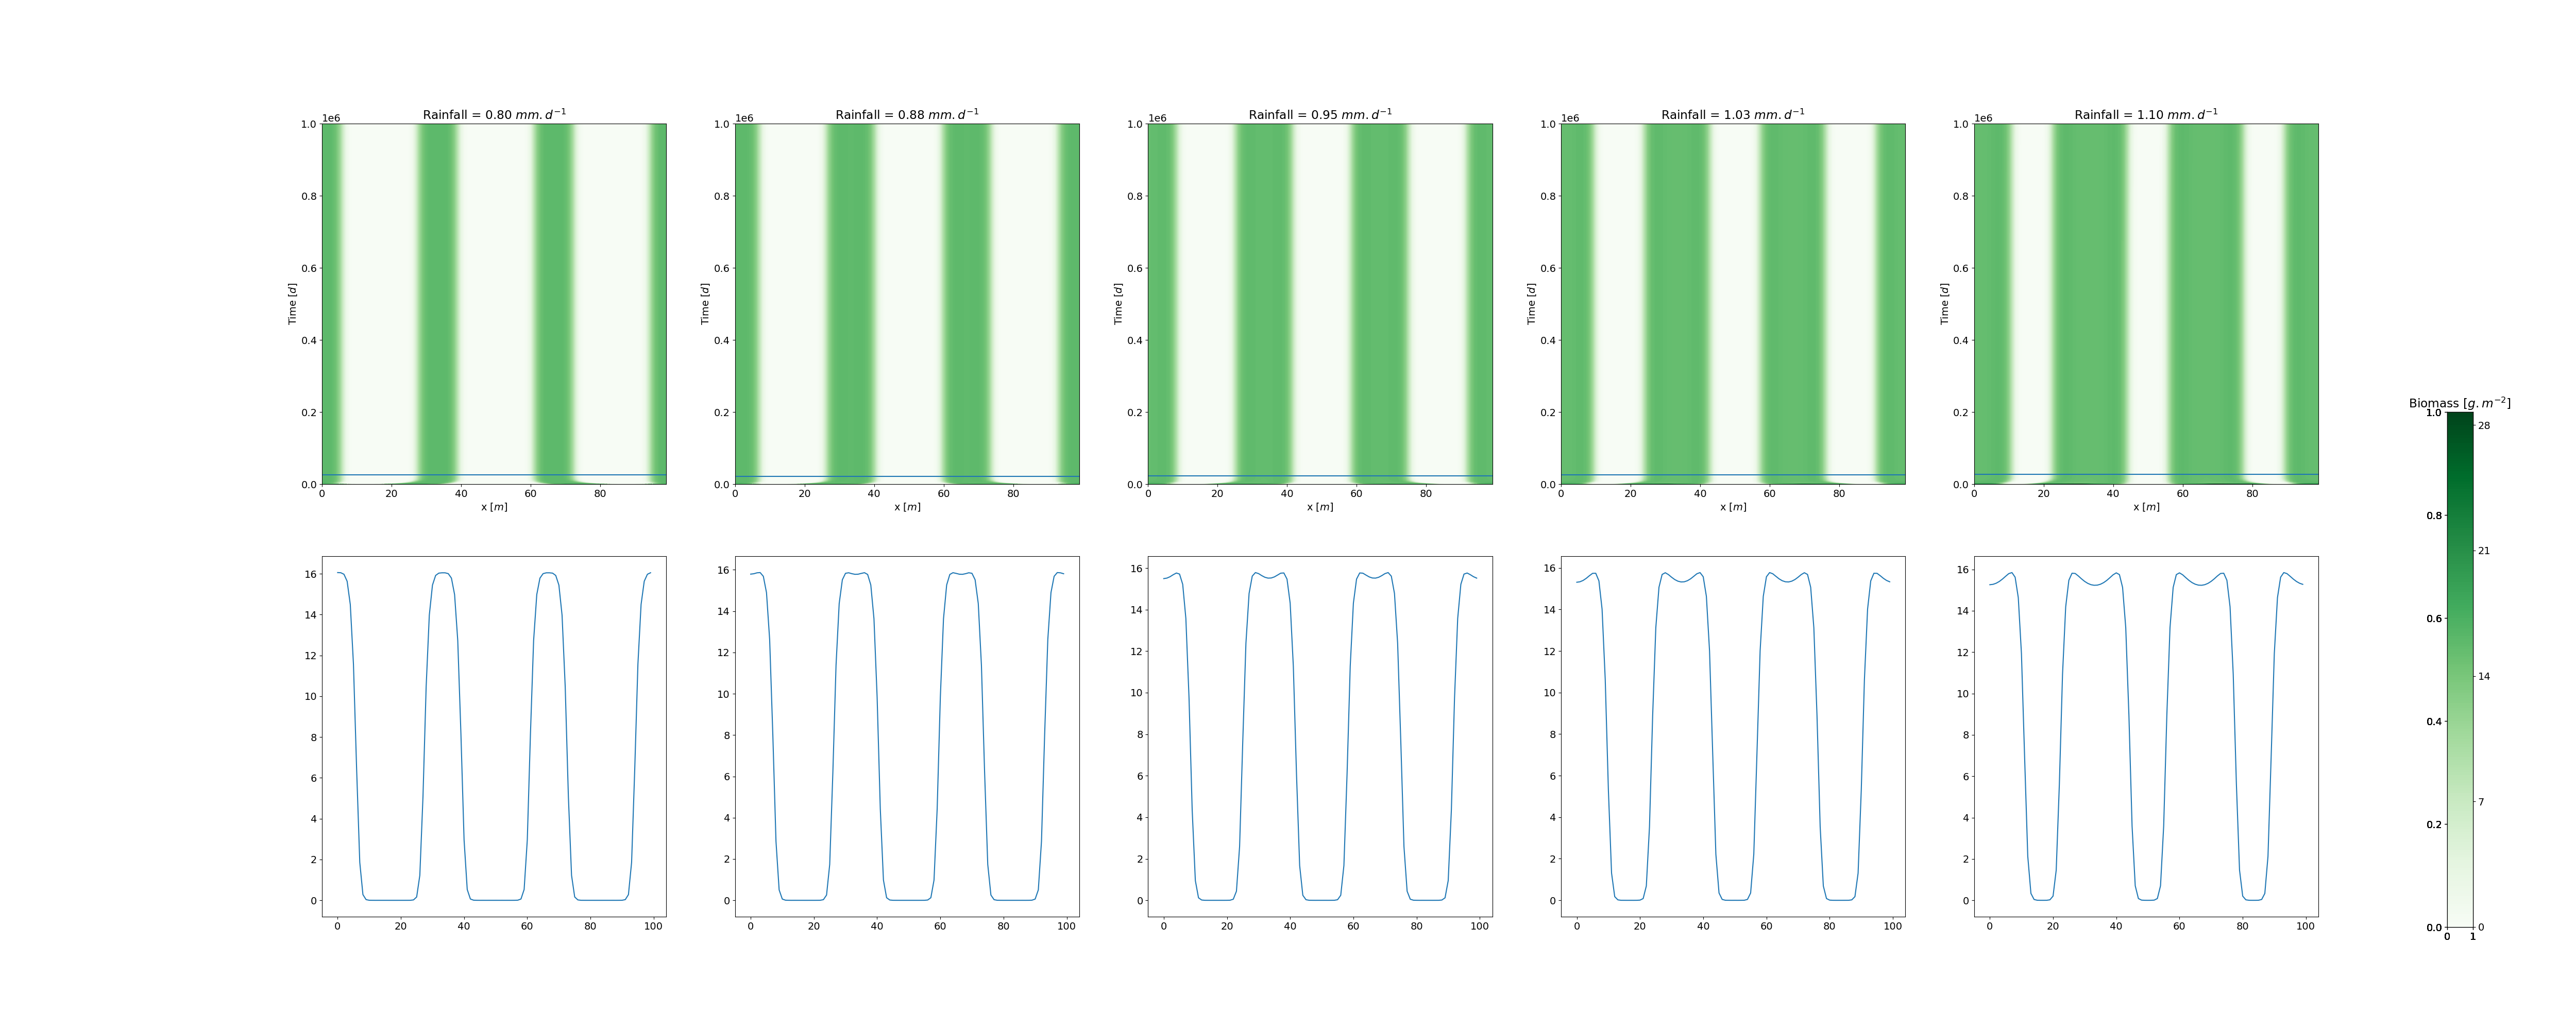

In [7]:
print(index_t_stab)
plt.rc('font', size=14) 
n_rains=np.shape(rains)[0]
t=Sol[0][-1]

print(n_rains)

fig=plt.figure(figsize=(50,20))

axs=[]
for i in range(2*n_rains):
    axs.append(fig.add_subplot(2,n_rains,i+1))

xx,tt=np.meshgrid(x,t)
c=np.linspace(-.001,np.max(np.max(Sol[-1][0])),201)
cax = plt.axes([0.95, 0.1,0.01,0.5])    
ticks_cbar=np.linspace(0,int(np.max(np.max(Sol[-1][0]))),5)
for i in range(n_rains):
    print(i)
    contB=axs[i].contourf(xx,tt,Sol[i][0],c,cmap=cm.Greens)
    cax = plt.axes([0.95, 0.1,0.01,0.5])    
    #ticks_cbar=np.linspace(0,int(np.max(np.max(Sol[i][0]))),5)
    axs[i].plot(x,np.ones(np.shape(x))*t[index_t_stab[i]])
    axs[i].set_xlabel('x $[m]$')
    axs[i].set_ylabel('Time $[d]$')
    axs[i].set_title('Rainfall = %.2f $mm.d^{-1}$'%(rains[i]))
    #axs[i].set_ylim((0,150000))
    axs[i+n_rains].plot(x,Sol[i][0][index_t_stab[i],:])

cbar=plt.colorbar(contB,cax=cax,orientation='vertical',ticks=ticks_cbar)
cbar.ax.set_title('Biomass $[g.m^{-2}]$')


Text(0.5, 1.0, 'n=4')

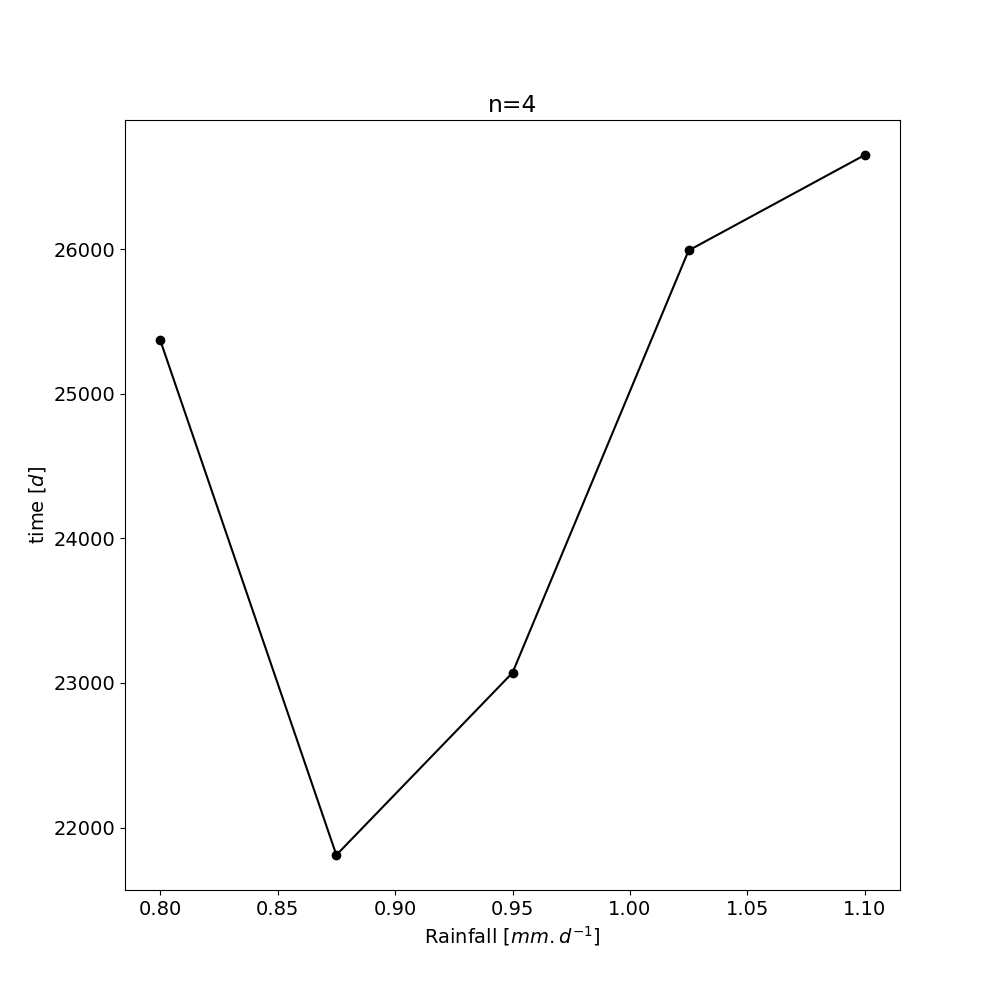

In [8]:
fig2=plt.figure(figsize=(10,10))
ax=fig2.add_subplot(1,1,1)
ax.plot(rains,t[index_t_stab],marker='o',color='black')
ax.set_xlabel('Rainfall $[mm.d^{-1}]$')
ax.set_ylabel('time $[d]$')
ax.set_title('n=%.d'%(4))
#fig2.savefig('figure/L= %.1f_TS_n=%.d_modif_2.png'%(L,n_mode))
